# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date', 'Dollar', 'Crude', 'Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea']]
df_96on.tail()

,Date,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea_Prod,Urea
1057,4/8/2016,94.235,40.99,365.00,2.077,49.85,1000000,316641.6667,248
1058,4/15/2016,94.696,41.71,382.00,1.997,50.85,1000000,316641.6667,255
1059,4/22/2016,95.116,44.54,375.50,2.267,51.00,1000000,316641.6667,238
1060,4/29/2016,93.082,46.69,391.75,2.322,50.75,1000000,316641.6667,232
1061,4/30/2016,93.082,46.69,391.75,2.322,50.75,1000000,316641.6667,232


In [2]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
My_Coal                   float64
Monthly Imports             int64
Urea_Prod                 float64
Urea                        int64
dtype: object

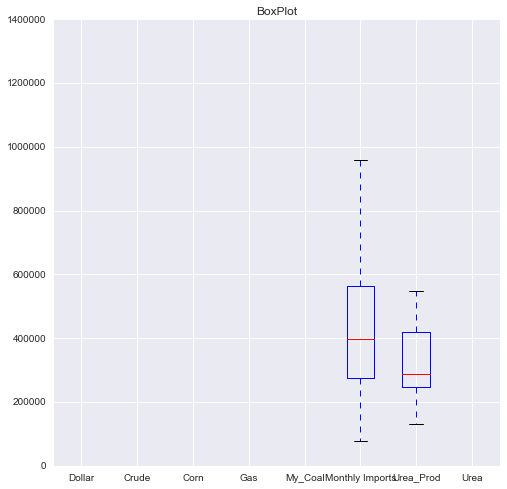

In [4]:
plt.show(df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

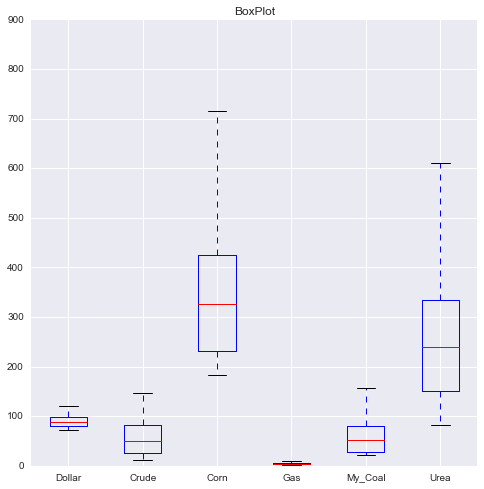

In [5]:
#no urea_prod and monthly imports since too big compared to others so not able to see them
plt.show(df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

In [6]:
df_96on.describe()

,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea_Prod,Urea
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,90.673056,54.785461,361.748588,4.598145,58.269067,437717.487759,321111.410575,260.028249
std,11.704768,31.243572,156.648138,2.364433,33.567989,226058.674754,97500.498985,135.620177
min,71.657000,11.260000,182.500000,1.661000,20.900000,76875.000000,129670.329700,83.000000
25%,81.181750,26.417500,231.062500,2.762500,27.425593,273879.500000,246470.588200,151.250000
50%,87.900000,49.170000,325.500000,4.025500,51.840000,399137.000000,287209.302300,240.000000
75%,98.708250,81.967500,424.437500,5.824750,79.675000,562811.000000,418566.750000,335.000000
max,119.900000,145.860000,809.250000,14.431000,192.500000,1400000.000000,549000.000000,825.000000


In [7]:
df_96on.corr() #gas and monthly imports no apparent correlation to urea

,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea_Prod,Urea
Dollar,1.000000,-0.775038,-0.681901,-0.330457,-0.755347,-0.255140,0.558864,-0.728465
Crude,-0.775038,1.000000,0.777411,0.393632,0.894882,0.379346,-0.740514,0.870389
Corn,-0.681901,0.777411,1.000000,-0.001415,0.835389,0.324131,-0.484917,0.799823
Gas,-0.330457,0.393632,-0.001415,1.000000,0.285473,0.156109,-0.479290,0.324833
My_Coal,-0.755347,0.894882,0.835389,0.285473,1.000000,0.328468,-0.644274,0.882454
Monthly Imports,-0.255140,0.379346,0.324131,0.156109,0.328468,1.000000,-0.436865,0.402426
Urea_Prod,0.558864,-0.740514,-0.484917,-0.479290,-0.644274,-0.436865,1.000000,-0.644789
Urea,-0.728465,0.870389,0.799823,0.324833,0.882454,0.402426,-0.644789,1.000000


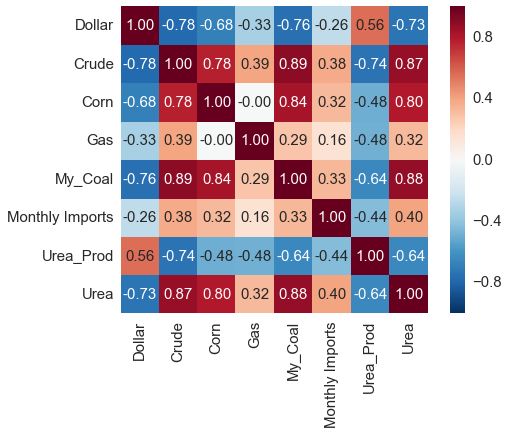

In [9]:
cols= ['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea']
cm = np.corrcoef(df_96on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#many of the x variables correlated to each other
#dollar to crude, corn, coal, urea_prod
#crude to dollar, corn, coal, urea_prod
#corn to dollar, crude, coal
#gas to nothing
#coal to dollar, crude, corn, urea_prod
#monthly import to nothing
#urea_prod to dollar, crude, coal
#urea to coal, crude, corn, dollar, urea_prod

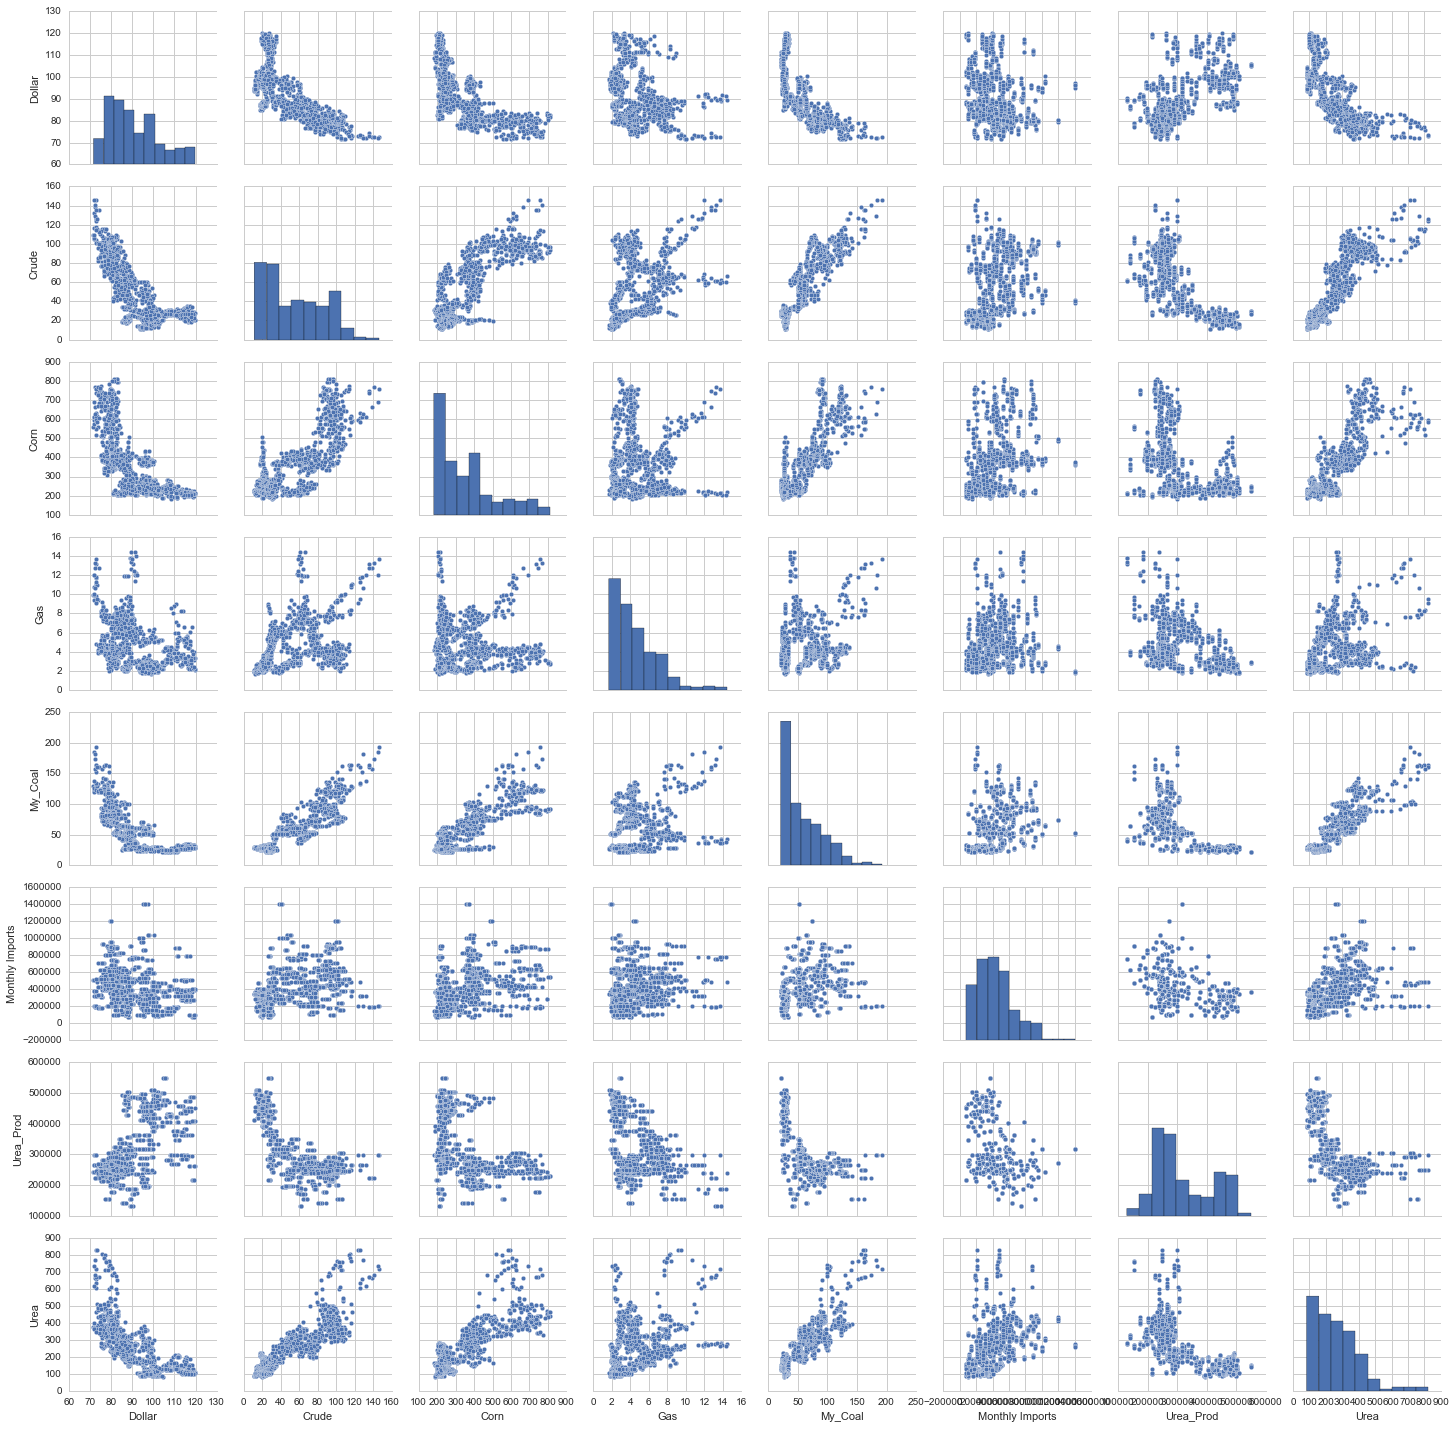

In [11]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_96on, size=2.5);
plt.show()
#pretty much all variables are positively skewed

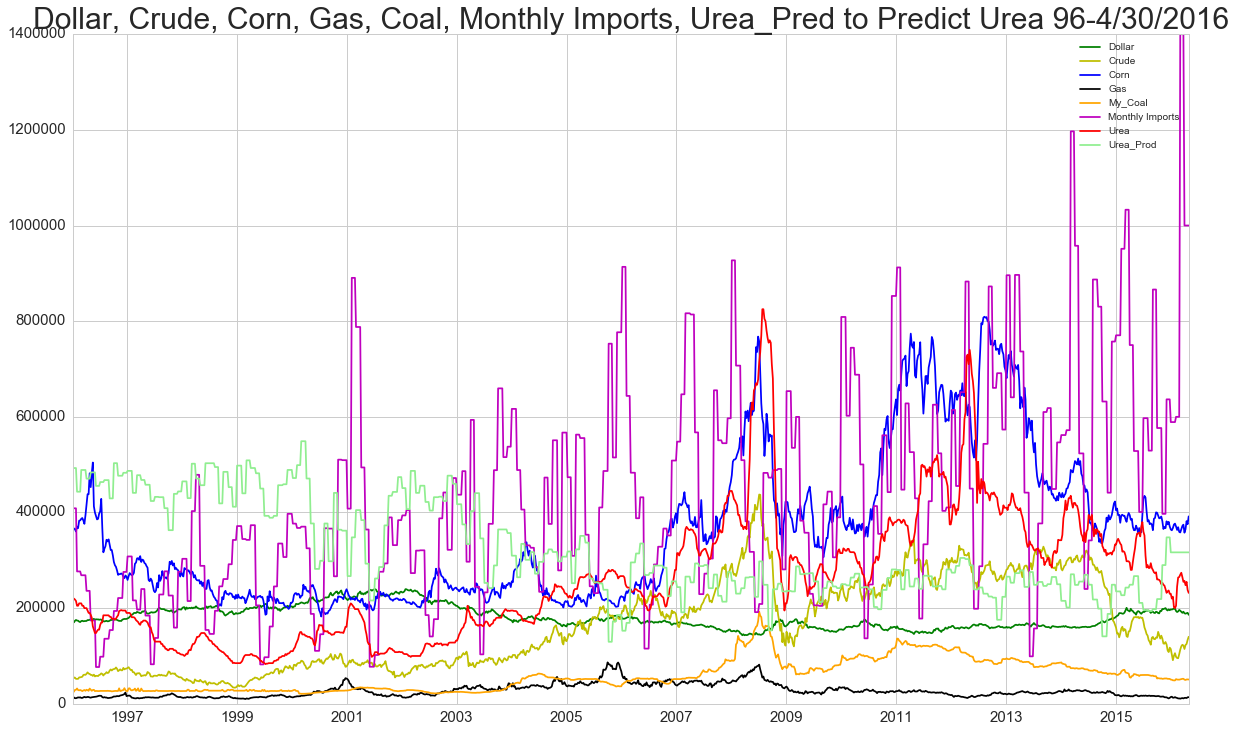

In [12]:
#trend, just modeify to look at the different variables and scaling
x = date
y1 = (df_96on['Dollar'])*2000
y2 = (df_96on['Crude'])*3000
y3 = (df_96on['Corn'])*1000
y4 = (df_96on['Gas'])*6000
y5 = (df_96on['My_Coal'])*1000
y6 = (df_96on['Monthly Imports'])
y8 = (df_96on['Urea_Prod'])
y7 = (df_96on['Urea'])*1000

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'y')
ax.plot(x,y3,'b')
ax.plot(x,y4,'k')
ax.plot(x,y5,'orange')
ax.plot(x,y6,'m')
ax.plot(x,y7,'r')
ax.plot(x,y8,'lightgreen')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Dollar, Crude, Corn, Gas, Coal, Monthly Imports, Urea_Pred to Predict Urea 96-4/30/2016', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

## Look at different MLR's since different X variables are highly correlated to each other

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     746.2
Date:                Tue, 03 May 2016   Prob (F-statistic):               0.00
Time:                        07:36:59   Log-Likelihood:                -5773.2
No. Observations:                1062   AIC:                         1.156e+04
Df Residuals:                    1054   BIC:                         1.160e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              19.9428     31.125      0.641      0.522       -41.131    81.017
Dollar             -0.3572      0.243     -1.472      0.141        -0.833     0.119
Crude               1.1098      0.154      7.201      0.000         0.807     1.412
Corn                0.2059      0.024      8.523      0.000         0.159     0.253
Gas                 5.4226      0.977      5.548      0.000         3.505     7.341
My_Coal             1.5332      0.134     11.417      0.000         1.270     1.797
Monthly Imports  4.939e-05   8.55e-06      5.774      0.000      3.26e-05  6.62e-05
Urea_Prod        4.011e-06   2.85e-05      0.141      0.888      -5.2e-05     6e-05
==============================================================================
Omnibus:                      439.155   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3670.542
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                      11.464   Cond. No.                     1.04e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Forward selection

#### Step 1, 1 variable regressions to see which one has lowest AIC (not p-value since p-value may give high values 
#### to variables that have high correlation)

In [37]:
#dollar
X = df_96on[['Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12642.0358444
const     7.786272e-255
Dollar    2.597162e-176
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     1198.
Date:                Mon, 02 May 2016   Prob (F-statistic):          2.60e-176
Time:                        11:35:26   Log-Likelihood:                -6319.0
No. Observations:                1062   AIC:                         1.264e+04
Df Residuals:                    1060   BIC:                         1.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1025.3573     22.290     46.000      0.000       981.619  1069.095
Dollar        -8.4405      0.244    -34.619      0.000        -8.919    -7.962
==============================================================================
Omnibus:                      327.835   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1071.407
Skew:                           1.504   Prob(JB):                    2.22e-233
Kurtosis:                       6.894   Cond. No.                         715.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#crude
X = df_96on[['Crude']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11940.4366641
const    4.755654e-35
Crude    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     3313.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:35:37   Log-Likelihood:                -5968.2
No. Observations:                1062   AIC:                         1.194e+04
Df Residuals:                    1060   BIC:                         1.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         53.0417      4.140     12.813      0.000        44.919    61.164
Crude          3.7781      0.066     57.554      0.000         3.649     3.907
==============================================================================
Omnibus:                      357.277   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1748.526
Skew:                           1.486   Prob(JB):                         0.00
Kurtosis:                       8.539   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#corn
X = df_96on[['Corn']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12361.2052828
const     1.300290e-01
Corn     3.215925e-237
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 02 May 2016   Prob (F-statistic):          3.22e-237
Time:                        11:36:18   Log-Likelihood:                -6178.6
No. Observations:                1062   AIC:                         1.236e+04
Df Residuals:                    1060   BIC:                         1.237e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          9.5328      6.292      1.515      0.130        -2.813    21.878
Corn           0.6925      0.016     43.384      0.000         0.661     0.724
==============================================================================
Omnibus:                      344.259   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1395.322
Skew:                           1.496   Prob(JB):                    1.02e-303
Kurtosis:                       7.752   Cond. No.                         992.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#coal
X = df_96on[['My_Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11843.4979173
const      1.517209e-37
My_Coal    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     3730.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:36:53   Log-Likelihood:                -5919.7
No. Observations:                1062   AIC:                         1.184e+04
Df Residuals:                    1060   BIC:                         1.185e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         52.2840      3.925     13.321      0.000        44.582    59.985
My_Coal        3.5653      0.058     61.077      0.000         3.451     3.680
==============================================================================
Omnibus:                      160.671   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.153
Skew:                           0.712   Prob(JB):                    1.71e-121
Kurtosis:                       6.247   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#urea_prod
X = df_96on[['Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12874.6121227
const        3.541869e-281
Urea_Prod    7.506985e-126
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     754.3
Date:                Mon, 02 May 2016   Prob (F-statistic):          7.51e-126
Time:                        11:37:19   Log-Likelihood:                -6435.3
No. Observations:                1062   AIC:                         1.287e+04
Df Residuals:                    1060   BIC:                         1.288e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        548.0271     10.959     50.009      0.000       526.524   569.530
Urea_Prod     -0.0009   3.27e-05    -27.465      0.000        -0.001    -0.001
==============================================================================
Omnibus:                      397.629   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1809.114
Skew:                           1.709   Prob(JB):                         0.00
Kurtosis:                       8.404   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#gas
X = df_96on[['Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

13326.9416201
const    2.816988e-77
Gas      1.612585e-27
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 02 May 2016   Prob (F-statistic):           1.61e-27
Time:                        11:37:33   Log-Likelihood:                -6661.5
No. Observations:                1062   AIC:                         1.333e+04
Df Residuals:                    1060   BIC:                         1.334e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        174.3561      8.614     20.241      0.000       157.453   191.259
Gas           18.6319      1.666     11.182      0.000        15.362    21.901
==============================================================================
Omnibus:                      223.128   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.267
Skew:                           1.258   Prob(JB):                     1.82e-90
Kurtosis:                       4.735   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#monthly import
X = df_96on[['Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

13257.7366772
const              6.773328e-67
Monthly Imports    1.307507e-42
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     204.8
Date:                Mon, 02 May 2016   Prob (F-statistic):           1.31e-42
Time:                        11:37:56   Log-Likelihood:                -6626.9
No. Observations:                1062   AIC:                         1.326e+04
Df Residuals:                    1060   BIC:                         1.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             154.3507      8.310     18.575      0.000       138.046   170.656
Monthly Imports     0.0002   1.69e-05     14.312      0.000         0.000     0.000
==============================================================================
Omnibus:                      378.741   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1347.757
Skew:                           1.722   Prob(JB):                    2.18e-293
Kurtosis:                       7.312   Cond. No.                     1.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 2 now using 2 variables (coal had lowest AIC)

In [44]:
#coal and dollar
X = df_96on[['My_Coal','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11801.7808134
const       4.202240e-17
My_Coal    1.390371e-184
Dollar      4.084142e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1964.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:41:56   Log-Likelihood:                -5897.9
No. Observations:                1062   AIC:                         1.180e+04
Df Residuals:                    1059   BIC:                         1.182e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        229.3634     26.822      8.551      0.000       176.734   281.993
My_Coal        3.1253      0.087     35.799      0.000         2.954     3.297
Dollar        -1.6702      0.250     -6.671      0.000        -2.162    -1.179
==============================================================================
Omnibus:                      200.066   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              788.927
Skew:                           0.849   Prob(JB):                    4.86e-172
Kurtosis:                       6.866   Cond. No.                     1.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#crude and coal
X = df_96on[['My_Coal','Crude']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11675.7146659
const      3.188748e-27
My_Coal    9.127719e-60
Crude      1.092656e-38
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     2278.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:42:28   Log-Likelihood:                -5834.9
No. Observations:                1062   AIC:                         1.168e+04
Df Residuals:                    1059   BIC:                         1.169e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         41.2890      3.715     11.115      0.000        34.000    48.578
My_Coal        2.1005      0.121     17.388      0.000         1.863     2.338
Crude          1.7586      0.130     13.549      0.000         1.504     2.013
==============================================================================
Omnibus:                      264.918   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1187.660
Skew:                           1.096   Prob(JB):                    1.27e-258
Kurtosis:                       7.694   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#corn and coal
X = df_96on[['My_Coal','Corn']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11781.2824212
const       7.766969e-09
My_Coal    3.717549e-128
Corn        1.241654e-15
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     2013.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:42:48   Log-Likelihood:                -5887.6
No. Observations:                1062   AIC:                         1.178e+04
Df Residuals:                    1059   BIC:                         1.180e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         28.1286      4.833      5.821      0.000        18.646    37.611
My_Coal        2.8656      0.103     27.798      0.000         2.663     3.068
Corn           0.1795      0.022      8.125      0.000         0.136     0.223
==============================================================================
Omnibus:                      202.185   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              759.961
Skew:                           0.874   Prob(JB):                    9.48e-166
Kurtosis:                       6.758   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#urea_prod and coal
X = df_96on[['My_Coal','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11796.6902514
const         2.577713e-27
My_Coal      4.436432e-236
Urea_Prod     3.064515e-12
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     1976.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:43:25   Log-Likelihood:                -5895.3
No. Observations:                1062   AIC:                         1.180e+04
Df Residuals:                    1059   BIC:                         1.181e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        130.2800     11.699     11.136      0.000       107.324   153.236
My_Coal        3.2259      0.075     43.228      0.000         3.080     3.372
Urea_Prod     -0.0002   2.57e-05     -7.057      0.000        -0.000    -0.000
==============================================================================
Omnibus:                      218.993   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.500
Skew:                           0.901   Prob(JB):                    7.32e-209
Kurtosis:                       7.291   Cond. No.                     2.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#gas and coal
X = df_96on[['My_Coal','Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11817.3463346
const      9.029468e-14
My_Coal    0.000000e+00
Gas        1.176825e-07
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1928.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:44:02   Log-Likelihood:                -5905.7
No. Observations:                1062   AIC:                         1.182e+04
Df Residuals:                    1059   BIC:                         1.183e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.6817      4.855      7.555      0.000        27.155    46.209
My_Coal        3.4737      0.060     57.766      0.000         3.356     3.592
Gas            4.5534      0.854      5.334      0.000         2.878     6.229
==============================================================================
Omnibus:                      210.010   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              939.444
Skew:                           0.854   Prob(JB):                    1.01e-204
Kurtosis:                       7.279   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#monthly imports and coal
X = df_96on[['My_Coal','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11775.0395847
const               9.753065e-10
My_Coal            9.881313e-324
Monthly Imports     5.287631e-17
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     2028.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:44:25   Log-Likelihood:                -5884.5
No. Observations:                1062   AIC:                         1.178e+04
Df Residuals:                    1059   BIC:                         1.179e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              28.9056      4.685      6.169      0.000        19.712    38.099
My_Coal             3.3978      0.060     56.806      0.000         3.280     3.515
Monthly Imports   7.57e-05   8.88e-06      8.523      0.000      5.83e-05  9.31e-05
==============================================================================
Omnibus:                      199.476   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              855.309
Skew:                           0.821   Prob(JB):                    1.87e-186
Kurtosis:                       7.079   Cond. No.                     1.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 3 (coal and crude)

In [50]:
#crude and coal, dollar
X = df_96on[['My_Coal','Crude','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11670.6766732
const      3.541267e-05
My_Coal    3.211932e-54
Crude      1.139403e-30
Dollar     8.113842e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1530.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:48:31   Log-Likelihood:                -5831.3
No. Observations:                1062   AIC:                         1.167e+04
Df Residuals:                    1058   BIC:                         1.169e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        112.3793     27.058      4.153      0.000        59.286   165.472
My_Coal        2.0288      0.123     16.433      0.000         1.787     2.271
Crude          1.6350      0.138     11.886      0.000         1.365     1.905
Dollar        -0.6632      0.250     -2.652      0.008        -1.154    -0.173
==============================================================================
Omnibus:                      281.266   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1343.184
Skew:                           1.148   Prob(JB):                    2.14e-292
Kurtosis:                       8.008   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#crude and coal, corn
X = df_96on[['My_Coal','Crude','Corn']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11628.248745
const      1.043516e-06
My_Coal    1.024544e-30
Crude      1.915121e-35
Corn       2.245976e-12
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1607.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:50:57   Log-Likelihood:                -5810.1
No. Observations:                1062   AIC:                         1.163e+04
Df Residuals:                    1058   BIC:                         1.165e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         22.1931      4.518      4.912      0.000        13.328    31.058
My_Coal        1.6194      0.136     11.896      0.000         1.352     1.886
Crude          1.6482      0.128     12.895      0.000         1.397     1.899
Corn           0.1470      0.021      7.102      0.000         0.106     0.188
==============================================================================
Omnibus:                      322.532   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1801.147
Skew:                           1.281   Prob(JB):                         0.00
Kurtosis:                       8.843   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#crude and coal, urea_prod
X = df_96on[['My_Coal','Crude','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11676.5071426
const        2.295873e-05
My_Coal      5.664477e-60
Crude        2.731690e-28
Urea_Prod    2.728412e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1520.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:49:01   Log-Likelihood:                -5834.3
No. Observations:                1062   AIC:                         1.168e+04
Df Residuals:                    1058   BIC:                         1.170e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         54.8346     12.893      4.253      0.000        29.535    80.134
My_Coal        2.1087      0.121     17.424      0.000         1.871     2.346
Crude          1.6806      0.148     11.358      0.000         1.390     1.971
Urea_Prod  -3.036e-05   2.77e-05     -1.097      0.273     -8.47e-05  2.39e-05
==============================================================================
Omnibus:                      272.840   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1255.031
Skew:                           1.123   Prob(JB):                    2.98e-273
Kurtosis:                       7.829   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#crude and coal, gas
X = df_96on[['My_Coal','Crude','Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11675.7483945
const      3.479859e-16
My_Coal    8.796523e-60
Crude      5.906936e-33
Gas        1.617338e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1521.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:51:05   Log-Likelihood:                -5833.9
No. Observations:                1062   AIC:                         1.168e+04
Df Residuals:                    1058   BIC:                         1.170e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         37.6296      4.541      8.287      0.000        28.720    46.539
My_Coal        2.1284      0.122     17.392      0.000         1.888     2.369
Crude          1.6966      0.137     12.377      0.000         1.428     1.966
Gas            1.1811      0.844      1.400      0.162        -0.474     2.836
==============================================================================
Omnibus:                      274.066   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1273.920
Skew:                           1.125   Prob(JB):                    2.35e-277
Kurtosis:                       7.871   Cond. No.                         232.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#crude and coal, urea_prod
X = df_96on[['My_Coal','Crude','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11636.9248946
const              9.238429e-09
My_Coal            1.080585e-62
Crude              3.386903e-32
Monthly Imports    1.851885e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1591.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:51:21   Log-Likelihood:                -5814.5
No. Observations:                1062   AIC:                         1.164e+04
Df Residuals:                    1058   BIC:                         1.166e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              25.4640      4.397      5.791      0.000        16.835    34.093
My_Coal             2.1209      0.119     17.882      0.000         1.888     2.354
Crude               1.5889      0.130     12.215      0.000         1.334     1.844
Monthly Imports  5.468e-05    8.5e-06      6.436      0.000       3.8e-05  7.13e-05
==============================================================================
Omnibus:                      312.691   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1626.243
Skew:                           1.261   Prob(JB):                         0.00
Kurtosis:                       8.513   Cond. No.                     1.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 4 (coal, crude, corn)

In [56]:
#crude and coal, corn, dollar
X = df_96on[['My_Coal','Crude','Corn','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11626.4016462
const      6.036816e-03
My_Coal    5.344569e-29
Crude      3.425627e-29
Corn       1.161320e-11
Dollar     5.042783e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1209.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:54:21   Log-Likelihood:                -5808.2
No. Observations:                1062   AIC:                         1.163e+04
Df Residuals:                    1057   BIC:                         1.165e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         74.4459     27.058      2.751      0.006        21.352   127.540
My_Coal        1.5815      0.137     11.517      0.000         1.312     1.851
Crude          1.5616      0.135     11.560      0.000         1.297     1.827
Corn           0.1426      0.021      6.861      0.000         0.102     0.183
Dollar        -0.4822      0.246     -1.959      0.050        -0.965     0.001
==============================================================================
Omnibus:                      336.315   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1959.879
Skew:                           1.329   Prob(JB):                         0.00
Kurtosis:                       9.101   Cond. No.                     6.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#crude and coal, corn, urea_prod
X = df_96on[['My_Coal','Crude','Corn','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11622.9321081
const        1.954008e-05
My_Coal      3.915345e-30
Crude        8.177507e-22
Corn         1.041373e-13
Urea_Prod    6.977517e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1214.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:54:57   Log-Likelihood:                -5806.5
No. Observations:                1062   AIC:                         1.162e+04
Df Residuals:                    1057   BIC:                         1.165e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         53.9061     12.567      4.290      0.000        29.247    78.565
My_Coal        1.5996      0.136     11.769      0.000         1.333     1.866
Crude          1.4474      0.147      9.813      0.000         1.158     1.737
Corn           0.1592      0.021      7.536      0.000         0.118     0.201
Urea_Prod  -7.461e-05   2.76e-05     -2.703      0.007        -0.000 -2.05e-05
==============================================================================
Omnibus:                      349.843   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2112.952
Skew:                           1.378   Prob(JB):                         0.00
Kurtosis:                       9.336   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#crude and coal, corn, gas
X = df_96on[['My_Coal','Crude','Corn','Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11592.4259662
const      3.295374e-01
My_Coal    2.778227e-27
Crude      1.763822e-19
Corn       3.169008e-20
Gas        8.565263e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1257.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:55:56   Log-Likelihood:                -5791.2
No. Observations:                1062   AIC:                         1.159e+04
Df Residuals:                    1057   BIC:                         1.162e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -6.2309      6.387     -0.975      0.330       -18.764     6.303
My_Coal        1.5035      0.135     11.129      0.000         1.238     1.769
Crude          1.2797      0.139      9.206      0.000         1.007     1.552
Corn           0.2250      0.024      9.403      0.000         0.178     0.272
Gas            5.9035      0.954      6.191      0.000         4.032     7.775
==============================================================================
Omnibus:                      390.426   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2827.943
Skew:                           1.503   Prob(JB):                         0.00
Kurtosis:                      10.408   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
#crude and coal, corn, monthly imports
X = df_96on[['My_Coal','Crude','Corn','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11593.9959989
const              7.884998e-02
My_Coal            3.157762e-33
Crude              8.634024e-30
Corn               2.300926e-11
Monthly Imports    1.908392e-09
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1255.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:56:45   Log-Likelihood:                -5792.0
No. Observations:                1062   AIC:                         1.159e+04
Df Residuals:                    1057   BIC:                         1.162e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               8.7387      4.968      1.759      0.079        -1.009    18.486
My_Coal             1.6678      0.134     12.434      0.000         1.405     1.931
Crude               1.4981      0.128     11.693      0.000         1.247     1.750
Corn                0.1380      0.020      6.758      0.000         0.098     0.178
Monthly Imports  5.055e-05   8.34e-06      6.058      0.000      3.42e-05  6.69e-05
==============================================================================
Omnibus:                      369.139   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2378.141
Skew:                           1.445   Prob(JB):                         0.00
Kurtosis:                       9.738   Cond. No.                     1.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 5 (coal, crude, corn, gas)

In [60]:
#crude and coal, corn, gas, dollar
X = df_96on[['My_Coal','Crude','Corn','Gas','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11593.4476454
const      4.599886e-01
My_Coal    1.972710e-26
Crude      1.215844e-17
Corn       5.280403e-19
Gas        3.767874e-09
Dollar     3.240990e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1006.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:58:48   Log-Likelihood:                -5790.7
No. Observations:                1062   AIC:                         1.159e+04
Df Residuals:                    1056   BIC:                         1.162e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         20.7828     28.118      0.739      0.460       -34.390    75.956
My_Coal        1.4875      0.136     10.933      0.000         1.221     1.754
Crude          1.2459      0.143      8.704      0.000         0.965     1.527
Corn           0.2208      0.024      9.078      0.000         0.173     0.268
Gas            5.7468      0.967      5.944      0.000         3.850     7.644
Dollar        -0.2423      0.246     -0.987      0.324        -0.724     0.240
==============================================================================
Omnibus:                      395.597   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2905.600
Skew:                           1.522   Prob(JB):                         0.00
Kurtosis:                      10.510   Cond. No.                     6.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
#crude and coal, corn, gas, urea_prod
X = df_96on[['My_Coal','Crude','Corn','Gas','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11592.4889787
const        4.167568e-01
My_Coal      3.748617e-27
Crude        9.200573e-15
Corn         1.610042e-20
Gas          1.359342e-08
Urea_Prod    1.652920e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1007.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:59:14   Log-Likelihood:                -5790.2
No. Observations:                1062   AIC:                         1.159e+04
Df Residuals:                    1056   BIC:                         1.162e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         11.7072     14.411      0.812      0.417       -16.570    39.985
My_Coal        1.4992      0.135     11.099      0.000         1.234     1.764
Crude          1.1944      0.152      7.863      0.000         0.896     1.492
Corn           0.2273      0.024      9.481      0.000         0.180     0.274
Gas            5.5986      0.978      5.723      0.000         3.679     7.518
Urea_Prod  -3.875e-05   2.79e-05     -1.388      0.165     -9.35e-05   1.6e-05
==============================================================================
Omnibus:                      400.942   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2978.574
Skew:                           1.543   Prob(JB):                         0.00
Kurtosis:                      10.602   Cond. No.                     2.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#crude and coal, corn, gas, monthly imports
X = df_96on[['My_Coal','Crude','Corn','Gas','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11560.5372723
const              7.289687e-03
My_Coal            1.172447e-29
Crude              2.488552e-16
Corn               1.066402e-18
Gas                2.912130e-09
Monthly Imports    6.492101e-09
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1044.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        11:59:41   Log-Likelihood:                -5774.3
No. Observations:                1062   AIC:                         1.156e+04
Df Residuals:                    1056   BIC:                         1.159e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             -17.7128      6.588     -2.689      0.007       -30.640    -4.785
My_Coal             1.5549      0.133     11.664      0.000         1.293     1.817
Crude               1.1540      0.139      8.330      0.000         0.882     1.426
Corn                0.2128      0.024      8.996      0.000         0.166     0.259
Gas                 5.6294      0.940      5.988      0.000         3.785     7.474
Monthly Imports   4.81e-05   8.22e-06      5.852      0.000       3.2e-05  6.42e-05
==============================================================================
Omnibus:                      431.429   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3523.163
Skew:                           1.653   Prob(JB):                         0.00
Kurtosis:                      11.288   Cond. No.                     1.91e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 6 (coal, crude, corn, gas, Urea_prod)

In [63]:
#crude and coal, corn, gas, urea_prod, dollar
X = df_96on[['My_Coal','Crude','Corn','Gas','Urea_Prod','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#as far as can go

11593.3991147
const        1.947067e-01
My_Coal      2.863021e-26
Crude        2.739477e-13
Corn         2.801079e-19
Gas          5.732509e-08
Urea_Prod    1.538088e-01
Dollar       2.982132e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     839.3
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:02:03   Log-Likelihood:                -5789.7
No. Observations:                1062   AIC:                         1.159e+04
Df Residuals:                    1055   BIC:                         1.163e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         40.7272     31.386      1.298      0.195       -20.860   102.314
My_Coal        1.4822      0.136     10.895      0.000         1.215     1.749
Crude          1.1564      0.156      7.402      0.000         0.850     1.463
Corn           0.2229      0.024      9.153      0.000         0.175     0.271
Gas            5.4245      0.992      5.466      0.000         3.477     7.372
Urea_Prod  -3.986e-05   2.79e-05     -1.427      0.154     -9.47e-05  1.49e-05
Dollar        -0.2557      0.246     -1.041      0.298        -0.738     0.226
==============================================================================
Omnibus:                      406.656   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3069.521
Skew:                           1.564   Prob(JB):                         0.00
Kurtosis:                      10.719   Cond. No.                     6.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
#crude and coal, corn, gas, urea_prod, monthly imports
X = df_96on[['My_Coal','Crude','Corn','Gas','Urea_Prod','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#p-value sig in one of the variables, can't do

11562.5094887
const              1.902959e-01
My_Coal            1.287414e-29
Crude              1.898397e-14
Corn               1.781990e-18
Gas                5.645981e-09
Urea_Prod          8.680826e-01
Monthly Imports    1.750167e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     869.3
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:02:39   Log-Likelihood:                -5774.3
No. Observations:                1062   AIC:                         1.156e+04
Df Residuals:                    1055   BIC:                         1.160e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             -19.9994     15.260     -1.311      0.190       -49.944     9.945
My_Coal             1.5559      0.133     11.655      0.000         1.294     1.818
Crude               1.1635      0.150      7.767      0.000         0.870     1.457
Corn                0.2124      0.024      8.935      0.000         0.166     0.259
Gas                 5.6646      0.964      5.876      0.000         3.773     7.556
Urea_Prod        4.743e-06   2.85e-05      0.166      0.868     -5.13e-05  6.08e-05
Monthly Imports  4.848e-05   8.54e-06      5.679      0.000      3.17e-05  6.52e-05
==============================================================================
Omnibus:                      430.332   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3508.173
Skew:                           1.648   Prob(JB):                         0.00
Kurtosis:                      11.271   Cond. No.                     5.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### so summary from forward selection is technically best model uses coal, crude, corn, gas, urea_prod, and dollar
#### however adding dollar only changed R^2 by 0.001 and AIC got worse
#### before dollar added, adding urea_prod only changed R^2 by 0.001 and AIC stayed the same
#### final model want, coal, crude, corn, gas

### Backward Selection 

In [65]:
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#wouldn't work since urea_prod p value too large

11562.328076
const              5.218367e-01
Dollar             1.412808e-01
Crude              1.131623e-12
Corn               5.340029e-17
Gas                3.661952e-08
My_Coal            1.515351e-28
Monthly Imports    1.018096e-08
Urea_Prod          8.882440e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     746.2
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:12:11   Log-Likelihood:                -5773.2
No. Observations:                1062   AIC:                         1.156e+04
Df Residuals:                    1054   BIC:                         1.160e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              19.9428     31.125      0.641      0.522       -41.131    81.017
Dollar             -0.3572      0.243     -1.472      0.141        -0.833     0.119
Crude               1.1098      0.154      7.201      0.000         0.807     1.412
Corn                0.2059      0.024      8.523      0.000         0.159     0.253
Gas                 5.4226      0.977      5.548      0.000         3.505     7.341
My_Coal             1.5332      0.134     11.417      0.000         1.270     1.797
Monthly Imports  4.939e-05   8.55e-06      5.774      0.000      3.26e-05  6.62e-05
Urea_Prod        4.011e-06   2.85e-05      0.141      0.888      -5.2e-05     6e-05
==============================================================================
Omnibus:                      439.155   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3670.542
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                      11.464   Cond. No.                     1.04e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 1 6 variables

In [66]:
#no dollar
X = df_96on[['Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#doesn't work

11562.5094887
const              1.902959e-01
Crude              1.898397e-14
Corn               1.781990e-18
Gas                5.645981e-09
My_Coal            1.287414e-29
Monthly Imports    1.750167e-08
Urea_Prod          8.680826e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     869.3
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:13:54   Log-Likelihood:                -5774.3
No. Observations:                1062   AIC:                         1.156e+04
Df Residuals:                    1055   BIC:                         1.160e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             -19.9994     15.260     -1.311      0.190       -49.944     9.945
Crude               1.1635      0.150      7.767      0.000         0.870     1.457
Corn                0.2124      0.024      8.935      0.000         0.166     0.259
Gas                 5.6646      0.964      5.876      0.000         3.773     7.556
My_Coal             1.5559      0.133     11.655      0.000         1.294     1.818
Monthly Imports  4.848e-05   8.54e-06      5.679      0.000      3.17e-05  6.52e-05
Urea_Prod        4.743e-06   2.85e-05      0.166      0.868     -5.13e-05  6.08e-05
==============================================================================
Omnibus:                      430.332   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3508.173
Skew:                           1.648   Prob(JB):                         0.00
Kurtosis:                      11.271   Cond. No.                     5.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
#no crude
X = df_96on[['Dollar','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11611.3376782
const              2.683160e-03
Dollar             1.442072e-03
Corn               1.811327e-24
Gas                5.195640e-13
My_Coal            3.117699e-54
Monthly Imports    2.454495e-09
Urea_Prod          7.559300e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     822.3
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:14:25   Log-Likelihood:                -5798.7
No. Observations:                1062   AIC:                         1.161e+04
Df Residuals:                    1055   BIC:                         1.165e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              90.9484     30.225      3.009      0.003        31.640   150.257
Dollar             -0.7711      0.241     -3.195      0.001        -1.245    -0.297
Corn                0.2504      0.024     10.469      0.000         0.203     0.297
Gas                 7.1054      0.972      7.312      0.000         5.199     9.012
My_Coal             1.9910      0.121     16.438      0.000         1.753     2.229
Monthly Imports  5.262e-05   8.75e-06      6.017      0.000      3.55e-05  6.98e-05
Urea_Prod       -7.256e-05   2.71e-05     -2.676      0.008        -0.000 -1.94e-05
==============================================================================
Omnibus:                      421.329   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3567.506
Skew:                           1.593   Prob(JB):                         0.00
Kurtosis:                      11.395   Cond. No.                     9.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
#no corn
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#doesn't work

11562.328076
const              5.218367e-01
Dollar             1.412808e-01
Crude              1.131623e-12
Corn               5.340029e-17
Gas                3.661952e-08
My_Coal            1.515351e-28
Monthly Imports    1.018096e-08
Urea_Prod          8.882440e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     746.2
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:15:16   Log-Likelihood:                -5773.2
No. Observations:                1062   AIC:                         1.156e+04
Df Residuals:                    1054   BIC:                         1.160e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              19.9428     31.125      0.641      0.522       -41.131    81.017
Dollar             -0.3572      0.243     -1.472      0.141        -0.833     0.119
Crude               1.1098      0.154      7.201      0.000         0.807     1.412
Corn                0.2059      0.024      8.523      0.000         0.159     0.253
Gas                 5.4226      0.977      5.548      0.000         3.505     7.341
My_Coal             1.5332      0.134     11.417      0.000         1.270     1.797
Monthly Imports  4.939e-05   8.55e-06      5.774      0.000      3.26e-05  6.62e-05
Urea_Prod        4.011e-06   2.85e-05      0.141      0.888      -5.2e-05     6e-05
==============================================================================
Omnibus:                      439.155   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3670.542
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                      11.464   Cond. No.                     1.04e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#no gas
X = df_96on[['Dollar','Crude','Corn','My_Coal','Monthly Imports','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11590.893385
const              3.562272e-03
Dollar             1.630666e-02
Crude              1.730992e-17
Corn               1.010191e-10
My_Coal            8.819924e-31
Monthly Imports    1.590228e-08
Urea_Prod          2.770592e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     841.7
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:15:39   Log-Likelihood:                -5788.4
No. Observations:                1062   AIC:                         1.159e+04
Df Residuals:                    1055   BIC:                         1.163e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              85.3278     29.211      2.921      0.004        28.010   142.646
Dollar             -0.5835      0.243     -2.406      0.016        -1.059    -0.108
Crude               1.3141      0.152      8.661      0.000         1.016     1.612
Corn                0.1379      0.021      6.532      0.000         0.096     0.179
My_Coal             1.6128      0.135     11.911      0.000         1.347     1.878
Monthly Imports  4.941e-05   8.67e-06      5.696      0.000      3.24e-05  6.64e-05
Urea_Prod        -3.07e-05   2.82e-05     -1.088      0.277     -8.61e-05  2.47e-05
==============================================================================
Omnibus:                      397.880   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2783.574
Skew:                           1.549   Prob(JB):                         0.00
Kurtosis:                      10.301   Cond. No.                     9.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
#no coal
X = df_96on[['Dollar','Crude','Corn','Gas','Monthly Imports','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#doesn't work

11684.1536491
const              1.444163e-01
Dollar             8.419008e-03
Crude              1.866824e-38
Corn               9.534226e-45
Gas                2.020297e-10
Monthly Imports    2.301677e-06
Urea_Prod          7.357954e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     756.2
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:16:03   Log-Likelihood:                -5835.1
No. Observations:                1062   AIC:                         1.168e+04
Df Residuals:                    1055   BIC:                         1.172e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              48.0177     32.875      1.461      0.144       -16.490   112.525
Dollar             -0.6742      0.255     -2.640      0.008        -1.175    -0.173
Crude               1.9425      0.144     13.505      0.000         1.660     2.225
Corn                0.3339      0.023     14.720      0.000         0.289     0.378
Gas                 6.6138      1.030      6.423      0.000         4.593     8.634
Monthly Imports  4.297e-05   9.04e-06      4.751      0.000      2.52e-05  6.07e-05
Urea_Prod        -1.02e-05   3.02e-05     -0.338      0.736     -6.95e-05  4.91e-05
==============================================================================
Omnibus:                      581.151   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6125.473
Skew:                           2.309   Prob(JB):                         0.00
Kurtosis:                      13.822   Cond. No.                     1.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
#no monthly imports
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11593.3991147
const        1.947067e-01
Dollar       2.982132e-01
Crude        2.739477e-13
Corn         2.801079e-19
Gas          5.732509e-08
My_Coal      2.863021e-26
Urea_Prod    1.538088e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     839.3
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:16:50   Log-Likelihood:                -5789.7
No. Observations:                1062   AIC:                         1.159e+04
Df Residuals:                    1055   BIC:                         1.163e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         40.7272     31.386      1.298      0.195       -20.860   102.314
Dollar        -0.2557      0.246     -1.041      0.298        -0.738     0.226
Crude          1.1564      0.156      7.402      0.000         0.850     1.463
Corn           0.2229      0.024      9.153      0.000         0.175     0.271
Gas            5.4245      0.992      5.466      0.000         3.477     7.372
My_Coal        1.4822      0.136     10.895      0.000         1.215     1.749
Urea_Prod  -3.986e-05   2.79e-05     -1.427      0.154     -9.47e-05  1.49e-05
==============================================================================
Omnibus:                      406.656   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3069.521
Skew:                           1.564   Prob(JB):                         0.00
Kurtosis:                      10.719   Cond. No.                     6.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
#no urea_prod
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#improves aic so delete

11560.3479831
const              4.279648e-01
Dollar             1.403764e-01
Crude              2.954176e-14
Corn               3.507426e-17
Gas                1.982947e-08
My_Coal            1.362689e-28
Monthly Imports    3.557745e-09
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     871.4
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:17:13   Log-Likelihood:                -5773.2
No. Observations:                1062   AIC:                         1.156e+04
Df Residuals:                    1055   BIC:                         1.160e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              21.9424     27.671      0.793      0.428       -32.353    76.238
Dollar             -0.3578      0.243     -1.476      0.140        -0.834     0.118
Crude               1.1017      0.143      7.707      0.000         0.821     1.382
Corn                0.2062      0.024      8.574      0.000         0.159     0.253
Gas                 5.3925      0.953      5.657      0.000         3.522     7.263
My_Coal             1.5324      0.134     11.427      0.000         1.269     1.796
Monthly Imports  4.907e-05   8.24e-06      5.954      0.000      3.29e-05  6.52e-05
==============================================================================
Omnibus:                      440.090   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3684.127
Skew:                           1.685   Prob(JB):                         0.00
Kurtosis:                      11.479   Cond. No.                     7.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 2 no urea_prod

In [73]:
#no urea_prod, dollar
X = df_96on[['Crude','Corn','Gas','My_Coal','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11560.5372723
const              7.289687e-03
Crude              2.488552e-16
Corn               1.066402e-18
Gas                2.912130e-09
My_Coal            1.172447e-29
Monthly Imports    6.492101e-09
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1044.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:22:32   Log-Likelihood:                -5774.3
No. Observations:                1062   AIC:                         1.156e+04
Df Residuals:                    1056   BIC:                         1.159e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             -17.7128      6.588     -2.689      0.007       -30.640    -4.785
Crude               1.1540      0.139      8.330      0.000         0.882     1.426
Corn                0.2128      0.024      8.996      0.000         0.166     0.259
Gas                 5.6294      0.940      5.988      0.000         3.785     7.474
My_Coal             1.5549      0.133     11.664      0.000         1.293     1.817
Monthly Imports   4.81e-05   8.22e-06      5.852      0.000       3.2e-05  6.42e-05
==============================================================================
Omnibus:                      431.429   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3523.163
Skew:                           1.653   Prob(JB):                         0.00
Kurtosis:                      11.288   Cond. No.                     1.91e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
#no urea_prod, crude
X = df_96on[['Dollar','Corn','Gas','My_Coal','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11616.5234377
const              3.280086e-02
Dollar             6.855297e-04
Corn               2.103617e-24
Gas                9.713056e-18
My_Coal            5.692904e-62
Monthly Imports    1.394078e-12
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     979.6
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:22:47   Log-Likelihood:                -5802.3
No. Observations:                1062   AIC:                         1.162e+04
Df Residuals:                    1056   BIC:                         1.165e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              59.7903     27.974      2.137      0.033         4.899   114.682
Dollar             -0.8218      0.241     -3.405      0.001        -1.295    -0.348
Corn                0.2507      0.024     10.453      0.000         0.204     0.298
Gas                 7.9953      0.916      8.731      0.000         6.198     9.792
My_Coal             2.0782      0.117     17.764      0.000         1.849     2.308
Monthly Imports  5.984e-05   8.34e-06      7.171      0.000      4.35e-05  7.62e-05
==============================================================================
Omnibus:                      401.170   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3316.151
Skew:                           1.507   Prob(JB):                         0.00
Kurtosis:                      11.115   Cond. No.                     7.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
#no urea_prod, corn
X = df_96on[['Dollar','Crude','Gas','My_Coal','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11629.8891509
const              1.749681e-04
Dollar             2.693108e-03
Crude              1.724516e-21
Gas                2.486051e-01
My_Coal            3.042662e-56
Monthly Imports    5.195784e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     964.7
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:23:04   Log-Likelihood:                -5808.9
No. Observations:                1062   AIC:                         1.163e+04
Df Residuals:                    1056   BIC:                         1.166e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             101.4932     26.949      3.766      0.000        48.613   154.373
Dollar             -0.7411      0.246     -3.008      0.003        -1.225    -0.258
Crude               1.3958      0.143      9.731      0.000         1.114     1.677
Gas                 0.9553      0.828      1.154      0.249        -0.669     2.579
My_Coal             2.0638      0.123     16.787      0.000         1.823     2.305
Monthly Imports  5.623e-05   8.48e-06      6.634      0.000      3.96e-05  7.29e-05
==============================================================================
Omnibus:                      339.630   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1965.289
Skew:                           1.346   Prob(JB):                         0.00
Kurtosis:                       9.096   Cond. No.                     7.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
#no urea_prod, gas
X = df_96on[['Dollar','Crude','Corn','My_Coal','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11590.0832465
const              6.751537e-03
Dollar             1.534373e-02
Crude              1.645102e-23
Corn               1.607579e-10
My_Coal            2.953206e-31
Monthly Imports    6.776599e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1010.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:23:20   Log-Likelihood:                -5789.0
No. Observations:                1062   AIC:                         1.159e+04
Df Residuals:                    1056   BIC:                         1.162e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              72.1695     26.589      2.714      0.007        19.995   124.344
Dollar             -0.5889      0.243     -2.428      0.015        -1.065    -0.113
Crude               1.3881      0.136     10.236      0.000         1.122     1.654
Corn                0.1324      0.020      6.459      0.000         0.092     0.173
My_Coal             1.6229      0.135     12.014      0.000         1.358     1.888
Monthly Imports  5.198e-05   8.35e-06      6.229      0.000      3.56e-05  6.84e-05
==============================================================================
Omnibus:                      388.092   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2655.002
Skew:                           1.511   Prob(JB):                         0.00
Kurtosis:                      10.132   Cond. No.                     7.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
#no urea_prod, coal
X = df_96on[['Dollar','Crude','Corn','Gas','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11682.2683155
const              1.422310e-01
Dollar             8.491047e-03
Crude              1.006310e-47
Corn               6.888852e-45
Gas                4.028392e-11
Monthly Imports    6.037421e-07
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     908.2
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:24:17   Log-Likelihood:                -5835.1
No. Observations:                1062   AIC:                         1.168e+04
Df Residuals:                    1056   BIC:                         1.171e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              42.9638     29.254      1.469      0.142       -14.439   100.367
Dollar             -0.6731      0.255     -2.637      0.008        -1.174    -0.172
Crude               1.9642      0.129     15.271      0.000         1.712     2.217
Corn                0.3333      0.023     14.746      0.000         0.289     0.378
Gas                 6.6922      1.003      6.673      0.000         4.724     8.660
Monthly Imports  4.377e-05   8.72e-06      5.021      0.000      2.67e-05  6.09e-05
==============================================================================
Omnibus:                      578.826   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6066.009
Skew:                           2.298   Prob(JB):                         0.00
Kurtosis:                      13.768   Cond. No.                     7.95e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
#no urea_prod, monthly imports
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11593.4476454
const      4.599886e-01
Dollar     3.240990e-01
Crude      1.215844e-17
Corn       5.280403e-19
Gas        3.767874e-09
My_Coal    1.972710e-26
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1006.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        12:24:40   Log-Likelihood:                -5790.7
No. Observations:                1062   AIC:                         1.159e+04
Df Residuals:                    1056   BIC:                         1.162e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         20.7828     28.118      0.739      0.460       -34.390    75.956
Dollar        -0.2423      0.246     -0.987      0.324        -0.724     0.240
Crude          1.2459      0.143      8.704      0.000         0.965     1.527
Corn           0.2208      0.024      9.078      0.000         0.173     0.268
Gas            5.7468      0.967      5.944      0.000         3.850     7.644
My_Coal        1.4875      0.136     10.933      0.000         1.221     1.754
==============================================================================
Omnibus:                      395.597   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2905.600
Skew:                           1.522   Prob(JB):                         0.00
Kurtosis:                      10.510   Cond. No.                     6.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### using backward selection only should get rid of urea_prod however p-value of dollar is too big so I have to get rid of dollar too so
#### no issue with p-value and AIC doesn't change at all
#### final model for backward would use all variables except urea_prod, and dollar
#### I will use forward selection model

### Do same thing for RDF, but I will do backward selection first

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [81]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [87]:
#do multiple times to see what parameters are the best
rdf_model_ureaall = fit_predict_model(X_train,y_train)
print (rdf_model_ureaall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [88]:
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)#crude, corn, coal, urea_prod

MSE train: 124.834, test: 1272.088
R^2 train: 0.993, test: 0.926
[ 0.01570857  0.64142087  0.07377357  0.02415272  0.17540973  0.01585886
  0.05367568]


In [89]:
#no dollar or monthly import since not important
X = df_96on[['Crude','Corn','Gas','My_Coal','Urea_Prod']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [94]:
rdf_model_ureanodollarimport = fit_predict_model(X_train,y_train)
print (rdf_model_ureanodollarimport.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [98]:
X = df_96on[['Crude','Corn','Gas','My_Coal','Urea_Prod']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 133.641, test: 1309.002
R^2 train: 0.993, test: 0.924
[ 0.65563045  0.08532237  0.02854784  0.16985077  0.06064857]


In [99]:
#no gas, monthly import, dollar
X = df_96on[['Crude','Corn','My_Coal','Urea_Prod']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [104]:
rdf_model_ureanodollarimportgas = fit_predict_model(X_train,y_train)
print (rdf_model_ureanodollarimportgas.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [105]:
X = df_96on[['Crude','Corn','My_Coal','Urea_Prod']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 159.427, test: 1561.833
R^2 train: 0.992, test: 0.910
[ 0.65734447  0.09196509  0.18648919  0.06420125]


In [106]:
#top 3
X = df_96on[['Crude','Corn','My_Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [109]:
rdf_model_ureatop3 = fit_predict_model(X_train,y_train)
print (rdf_model_ureatop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [114]:
#this time top 3 not enough in my opinion
X = df_96on[['Crude','Corn','My_Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 225.321, test: 2103.506
R^2 train: 0.988, test: 0.878
[ 0.66706886  0.09596433  0.23696681]


In [115]:
#like MLR model paramters
X = df_96on[['Crude','Corn','My_Coal','Gas']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [119]:
rdf_model_ureatop4 = fit_predict_model(X_train,y_train)
print (rdf_model_ureatop4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [120]:
#best in my opinion
X = df_96on[['Crude','Corn','My_Coal','Gas']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 161.351, test: 1437.494
R^2 train: 0.991, test: 0.917
[ 0.67169522  0.07950825  0.18155755  0.06723898]


# Average Case
####                 crude	 corn	      gas	  coal
#### Q2-16	 	 39.42 	 370.22 	 2.11 	 51.70 
#### Q3-16		 44.49 	 373.22 	 2.39 	 51.75 
#### Q4-16	 	 47.96 	 375.33 	 2.62 	 51.55 
#### Q1-17	 	 49.26 	 366.71 	 2.87 	 52.83 
#### Q2-17	 	 52.41 	 375.17 	 2.75 	 53.67 
#### ALL-17	 	 53.67 	 385.22 	 2.93 	 56.28 
#### ALL-18	 	 62.61 	 406.00 	 3.43 	 64.07 
#### ALL-19	 	 66.60 	 392.00 	 3.70 	 66.90 
#### ALL-20	 	 77.06 	 466.25 	 3.94 	 58.10 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilavg.csv")
df_96on = data[['Date','Crude','Corn','My_Coal','Gas','Urea']][0:1062]
df_96on.tail()
#1/5/1996 - 4/30/2016

,Date,Crude,Corn,My_Coal,Gas,Urea
1057,4/8/2016,40.99,365.00,49.85,2.08,248
1058,4/15/2016,41.71,382.00,50.85,2.00,255
1059,4/22/2016,44.54,375.50,51.00,2.27,238
1060,4/29/2016,46.69,391.75,50.75,2.32,232
1061,4/30/2016,46.69,391.75,50.75,2.32,232


In [6]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date       datetime64[ns]
Crude             float64
Corn              float64
My_Coal           float64
Gas               float64
Urea              float64
dtype: object

In [133]:
df_96on.describe()

,Crude,Corn,My_Coal,Gas,Urea
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,54.785461,361.748588,58.269360,4.598559,260.028249
std,31.243572,156.648138,33.567719,2.364318,135.620177
min,11.260000,182.500000,20.900000,1.660000,83.000000
25%,26.417500,231.062500,27.430000,2.760000,151.250000
50%,49.170000,325.500000,51.840000,4.025000,240.000000
75%,81.967500,424.437500,79.675000,5.825000,335.000000
max,145.860000,809.250000,192.500000,14.430000,825.000000


### 2 MLR models I will use 

In [7]:
#top 3 like previous model in march
X = df_96on[['Crude','Corn','My_Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1607.
Date:                Tue, 03 May 2016   Prob (F-statistic):               0.00
Time:                        07:37:48   Log-Likelihood:                -5810.1
No. Observations:                1062   AIC:                         1.163e+04
Df Residuals:                    1058   BIC:                         1.165e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         22.1919      4.518      4.912      0.000        13.327    31.057
Crude          1.6482      0.128     12.896      0.000         1.397     1.899
Corn           0.1470      0.021      7.102      0.000         0.106     0.188
My_Coal        1.6194      0.136     11.896      0.000         1.352     1.886
==============================================================================
Omnibus:                      322.530   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1801.126
Skew:                           1.281   Prob(JB):                         0.00
Kurtosis:                       8.843   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
#Best MLR model
X = df_96on[['Crude','Corn','My_Coal','Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1257.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        14:35:38   Log-Likelihood:                -5791.2
No. Observations:                1062   AIC:                         1.159e+04
Df Residuals:                    1057   BIC:                         1.162e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -6.2494      6.388     -0.978      0.328       -18.784     6.286
Crude          1.2795      0.139      9.205      0.000         1.007     1.552
Corn           0.2251      0.024      9.405      0.000         0.178     0.272
My_Coal        1.5034      0.135     11.129      0.000         1.238     1.768
Gas            5.9063      0.954      6.193      0.000         4.035     7.778
==============================================================================
Omnibus:                      390.458   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2828.675
Skew:                           1.503   Prob(JB):                         0.00
Kurtosis:                      10.409   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2 RDF models will be used (parameters found above in exploratory analysis)

In [9]:
#rdf using top 3 variables
X = df_96on[['Crude','Corn','My_Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 227.335, test: 2064.181
R^2 train: 0.988, test: 0.881
[ 0.67663252  0.09613918  0.2272283 ]


In [10]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_Pred_RDF_Top3'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_Pred_RDF_Top3'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error'] = rdf_error3

mlrtop3_predicted = 22.1919 + (df_96on['Crude']*1.6482) + (df_96on['Corn']*0.1470) + (df_96on['My_Coal']*1.6194) 
df_96on['Urea_Pred_MLR_Top3'] = mlrtop3_predicted
mlrtop3_error = (abs(df_96on['Urea_Pred_MLR_Top3'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_Top3'] = mlrtop3_error

mlrtop3_predicted2 = -6.2494 + (df_96on['Crude']*1.2795) + (df_96on['Corn']*0.2251) + (df_96on['My_Coal']*1.5034) + (df_96on['Gas']*5.9063) 
df_96on['Urea_Pred_MLR_Suggested'] = mlrtop3_predicted2
mlrtop3_error2 = (abs(df_96on['Urea_Pred_MLR_Suggested'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_Suggested'] = mlrtop3_error2

print("Average RDF Top 3 error is: %.3f" % (rdf_error3.mean())) 
print("Average MLR Top3 error is: %.3f" % (mlrtop3_error.mean()))
print("Average MLR Suggested error is: %.3f" % (mlrtop3_error2.mean()))

df_96on

Average RDF Top 3 error is: 5.545
Average MLR Top3 error is: 16.719
Average MLR Suggested error is: 15.472


,Date,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_RDF_Top3,RDF_Top3_Error,Urea_Pred_MLR_Top3,MLR_Error_Top3,Urea_Pred_MLR_Suggested,MLR_Error_Suggested
0,1996-01-05,19.65,369.75,25.36,2.42,220,203.189722,7.641035,150.000264,31.818062,154.542970,29.753195
1,1996-01-12,17.98,366.25,25.27,2.22,220,213.653333,2.884848,146.587524,33.369307,150.301789,31.681005
2,1996-01-19,18.25,365.00,29.07,1.96,218,203.816667,6.506116,153.002508,29.815363,154.543161,29.108642
3,1996-01-26,17.36,360.25,29.20,1.95,215,201.756667,6.159690,151.047882,29.745171,152.471560,29.082995
4,1996-02-02,17.38,370.50,32.11,2.08,205,199.263333,2.798374,157.300050,23.268268,159.947138,21.977006
5,1996-02-09,17.38,367.25,28.67,2.24,205,201.330000,1.790244,151.251564,26.218749,154.988875,24.395671
6,1996-02-16,18.40,382.75,28.17,2.17,210,200.813333,4.374603,154.401528,26.475463,158.617874,24.467679
7,1996-02-23,18.45,383.50,28.83,2.26,210,203.086667,3.292063,155.662992,25.874766,160.374485,23.631198
8,1996-03-01,18.62,386.75,27.86,2.06,210,193.529630,7.843034,154.850118,26.261849,158.684017,24.436182
9,1996-03-08,18.87,388.50,26.51,2.05,205,187.308889,8.629810,153.333228,25.203303,157.309164,23.263822


In [15]:
#best in my opinion
X = df_96on[['Crude','Corn','My_Coal','Gas']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 166.915, test: 1407.513
R^2 train: 0.991, test: 0.919
[ 0.62723763  0.0881133   0.21801523  0.06663383]


In [16]:
#adding last model
urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['Urea_Pred_RDF_Suggested'] = urea_predicted4
rdf_error4 = (abs(df_96on['Urea_Pred_RDF_Suggested'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error_Suggested'] = rdf_error4

print("Average RDF suggested error is: %.3f" % (rdf_error4.mean()))
df_96on

Average RDF suggested error is: 4.531


,Date,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_RDF_Top3,RDF_Top3_Error,Urea_Pred_MLR_Top3,MLR_Error_Top3,Urea_Pred_MLR_Suggested,MLR_Error_Suggested,Urea_Pred_RDF_Suggested,RDF_Top3_Error_Suggested
0,1996-01-05,19.65,369.75,25.36,2.42,220,203.189722,7.641035,150.000264,31.818062,154.542970,29.753195,205.401018,6.635901
1,1996-01-12,17.98,366.25,25.27,2.22,220,213.653333,2.884848,146.587524,33.369307,150.301789,31.681005,206.850952,5.976840
2,1996-01-19,18.25,365.00,29.07,1.96,218,203.816667,6.506116,153.002508,29.815363,154.543161,29.108642,200.418302,8.064999
3,1996-01-26,17.36,360.25,29.20,1.95,215,201.756667,6.159690,151.047882,29.745171,152.471560,29.082995,199.412857,7.249834
4,1996-02-02,17.38,370.50,32.11,2.08,205,199.263333,2.798374,157.300050,23.268268,159.947138,21.977006,201.399190,1.756492
5,1996-02-09,17.38,367.25,28.67,2.24,205,201.330000,1.790244,151.251564,26.218749,154.988875,24.395671,200.303421,2.291014
6,1996-02-16,18.40,382.75,28.17,2.17,210,200.813333,4.374603,154.401528,26.475463,158.617874,24.467679,200.657952,4.448594
7,1996-02-23,18.45,383.50,28.83,2.26,210,203.086667,3.292063,155.662992,25.874766,160.374485,23.631198,202.496405,3.573141
8,1996-03-01,18.62,386.75,27.86,2.06,210,193.529630,7.843034,154.850118,26.261849,158.684017,24.436182,197.354341,6.021742
9,1996-03-08,18.87,388.50,26.51,2.05,205,187.308889,8.629810,153.333228,25.203303,157.309164,23.263822,195.930195,4.424295


In [23]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Crude','Corn','My_Coal','Gas']][1062:2768]
newpred = data [['Crude','Corn','My_Coal']][1062:2768]
newpred3 = data[['Crude','Corn','My_Coal','Gas']][1062:2768]

In [24]:
#new predictions
X = df_96on[['Crude','Corn','My_Coal']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Crude','Corn','My_Coal','Gas']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Urea_Pred_RDF_Top3'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 222.854, test: 2081.511
R^2 train: 0.988, test: 0.880
[ 0.66370575  0.10323801  0.23305624]


,Date,Crude,Corn,My_Coal,Gas,Urea_Pred_RDF_Top3
0,2016-05-01,46.69,391.75,50.75,2.32,235.939905
1,2016-05-02,46.69,391.75,50.75,2.32,235.939905
2,2016-05-03,46.57,391.39,50.77,2.32,236.259905
3,2016-05-04,46.44,391.02,50.78,2.31,236.259905
4,2016-05-05,46.32,390.66,50.8,2.31,236.864905
5,2016-05-06,46.2,390.29,50.81,2.31,238.629047
6,2016-05-07,46.07,389.93,50.83,2.3,240.089999
7,2016-05-08,45.95,389.56,50.85,2.3,242.501666
8,2016-05-09,45.83,389.2,50.86,2.3,246.058110
9,2016-05-10,45.7,388.83,50.88,2.29,246.592666


In [25]:
#other predictions
X = df_96on[['Crude','Corn','My_Coal','Gas']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Urea_Pred_RDF_Suggested'] = df_new_pred2

mlrtop3_predicted5 = 22.1919 + (newpred2['Crude']*1.6482) + (newpred2['Corn']*0.1470) + (newpred2['My_Coal']*1.6194) 
newpred2['Urea_Pred_MLR_Top3'] = mlrtop3_predicted5

mlrtop3_predicted6 = -6.2494 + (newpred2['Crude']*1.2795) + (newpred2['Corn']*0.2251) + (newpred2['My_Coal']*1.5034) + (newpred2['Gas']*5.9063)
newpred2['Urea_Pred_MLR_Suggested'] = mlrtop3_predicted6

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 160.950, test: 1450.853
R^2 train: 0.991, test: 0.916
[ 0.64802906  0.10059762  0.18223557  0.06913775]


,Date,Crude,Corn,My_Coal,Gas,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested
0,2016-05-01,46.69,391.75,50.75,2.32,235.939905,236.301855,238.918,231.674
1,2016-05-02,46.69,391.75,50.75,2.32,235.939905,236.301855,238.918,231.674
2,2016-05-03,46.57,391.39,50.77,2.32,236.259905,236.746300,238.7,231.469
3,2016-05-04,46.44,391.02,50.78,2.31,236.259905,236.746300,238.447,231.175
4,2016-05-05,46.32,390.66,50.8,2.31,236.864905,237.645411,238.229,230.971
5,2016-05-06,46.2,390.29,50.81,2.31,238.629047,238.893863,237.993,230.749
6,2016-05-07,46.07,389.93,50.83,2.3,240.089999,240.394826,237.758,230.473
7,2016-05-08,45.95,389.56,50.85,2.3,242.501666,240.632603,237.538,230.266
8,2016-05-09,45.83,389.2,50.86,2.3,246.058110,242.894309,237.304,230.046
9,2016-05-10,45.7,388.83,50.88,2.29,246.592666,244.296309,237.068,229.768


In [26]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Corn,Crude,Date,Gas,MLR_Error_Suggested,MLR_Error_Top3,My_Coal,RDF_Top3_Error,RDF_Top3_Error_Suggested,Urea,Urea_Pred_MLR_Suggested,Urea_Pred_MLR_Top3,Urea_Pred_RDF_Suggested,Urea_Pred_RDF_Top3
0,369.75,19.65,1996-01-05,2.42,29.753195,31.818062,25.36,7.641035,6.635901,220,154.543,150,205.401018,203.189722
1,366.25,17.98,1996-01-12,2.22,31.681005,33.369307,25.27,2.884848,5.976840,220,150.302,146.588,206.850952,213.653333
2,365,18.25,1996-01-19,1.96,29.108642,29.815363,29.07,6.506116,8.064999,218,154.543,153.003,200.418302,203.816667
3,360.25,17.36,1996-01-26,1.95,29.082995,29.745171,29.2,6.159690,7.249834,215,152.472,151.048,199.412857,201.756667
4,370.5,17.38,1996-02-02,2.08,21.977006,23.268268,32.11,2.798374,1.756492,205,159.947,157.3,201.399190,199.263333
5,367.25,17.38,1996-02-09,2.24,24.395671,26.218749,28.67,1.790244,2.291014,205,154.989,151.252,200.303421,201.330000
6,382.75,18.4,1996-02-16,2.17,24.467679,26.475463,28.17,4.374603,4.448594,210,158.618,154.402,200.657952,200.813333
7,383.5,18.45,1996-02-23,2.26,23.631198,25.874766,28.83,3.292063,3.573141,210,160.374,155.663,202.496405,203.086667
8,386.75,18.62,1996-03-01,2.06,24.436182,26.261849,27.86,7.843034,6.021742,210,158.684,154.85,197.354341,193.529630
9,388.5,18.87,1996-03-08,2.05,23.263822,25.203303,26.51,8.629810,4.424295,205,157.309,153.333,195.930195,187.308889


In [27]:
combined = combined[['Date','Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']
combined

,Date,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested
0,1996-01-05 00:00:00,19.65,369.75,25.36,2.42,220,150,154.543,203.19,205.401
1,1996-01-12 00:00:00,17.98,366.25,25.27,2.22,220,146.588,150.302,213.653,206.851
2,1996-01-19 00:00:00,18.25,365,29.07,1.96,218,153.003,154.543,203.817,200.418
3,1996-01-26 00:00:00,17.36,360.25,29.2,1.95,215,151.048,152.472,201.757,199.413
4,1996-02-02 00:00:00,17.38,370.5,32.11,2.08,205,157.3,159.947,199.263,201.399
5,1996-02-09 00:00:00,17.38,367.25,28.67,2.24,205,151.252,154.989,201.33,200.303
6,1996-02-16 00:00:00,18.4,382.75,28.17,2.17,210,154.402,158.618,200.813,200.658
7,1996-02-23 00:00:00,18.45,383.5,28.83,2.26,210,155.663,160.374,203.087,202.496
8,1996-03-01 00:00:00,18.62,386.75,27.86,2.06,210,154.85,158.684,193.53,197.354
9,1996-03-08 00:00:00,18.87,388.5,26.51,2.05,205,153.333,157.309,187.309,195.93


In [28]:
combined.to_csv("C:/Users/msteinme/Documents/ureaaprilavgresults.csv")

In [94]:
#split into months
cols = ['Date','Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [96]:
mycolumns = ['Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested
295,73.130968,438.380645,61.402903,3.850000,NaN,306.604177,301.053536,309.401956,285.620589
296,74.005000,444.585000,60.667667,3.869667,NaN,307.766155,302.579263,328.028564,293.081303
297,74.878387,450.790000,59.932258,3.889355,NaN,308.926886,304.104179,331.733716,296.172848
298,75.752333,456.994333,59.197000,3.909000,NaN,310.088685,305.629631,330.605386,295.569084
299,76.626129,463.198710,58.461613,3.928710,NaN,311.250032,307.155088,332.207522,296.059461


In [97]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [99]:
print(df.dtypes)
df.tail()

Crude                             float64
Corn                              float64
My_Coal                           float64
Gas                               float64
Urea                              float64
Urea_Pred_MLR_Top3                float64
Urea_Pred_MLR_Suggested           float64
Urea_Pred_RDF_Top3                float64
Urea_Pred_RDF_Suggested           float64
Monthly_Date               datetime64[ns]
dtype: object


,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested,Monthly_Date
295,73.130968,438.380645,61.402903,3.850000,NaN,306.604177,301.053536,309.401956,285.620589,2020-08-31
296,74.005000,444.585000,60.667667,3.869667,NaN,307.766155,302.579263,328.028564,293.081303,2020-09-30
297,74.878387,450.790000,59.932258,3.889355,NaN,308.926886,304.104179,331.733716,296.172848,2020-10-31
298,75.752333,456.994333,59.197000,3.909000,NaN,310.088685,305.629631,330.605386,295.569084,2020-11-30
299,76.626129,463.198710,58.461613,3.928710,NaN,311.250032,307.155088,332.207522,296.059461,2020-12-31


In [113]:
df.to_csv("C:/Users/msteinme/Documents/ureaaprilavgresultsmonthly.csv")

In [110]:
#std of each of the different models
mlrtop3_upper = df['Urea_Pred_MLR_Top3'] + statistics.pstdev(combined['Urea_Pred_MLR_Top3'],mu=combined['Urea_Pred_MLR_Top3'].mean())
df['MLR Top3 Upper'] = mlrtop3_upper
mlrtop3_lower = df['Urea_Pred_MLR_Top3'] - combined['Urea_Pred_MLR_Top3'].pstdev()
df['MLR Top3 Lower'] = mlrtop3_lower

mlrtop4_upper = df['Urea_Pred_MLR_Suggested'] + combined['Urea_Pred_MLR_Suggested'].pstdev()
df['MLR Suggested Upper'] = mlrtop4_upper
mlrtop4_lower = df['Urea_Pred_MLR_Suggested'] - combined['Urea_Pred_MLR_Suggested'].pstdev()
df['MLR Suggested Lower'] = mlrtop4_lower

rdftop3_upper = df['Urea_Pred_RDF_Top3'] + combined['Urea_Pred_RDF_Top3'].pstdev()
df['RDF Top3 Upper'] = rdftop3_upper
rdftop3_lower = df['Urea_Pred_RDF_Top3'] - combined['Urea_Pred_RDF_Top3'].pstdev()
df['RDF Top3 Lower'] = rdftop3_lower

rdftop4_upper = df['Urea_Pred_RDF_Suggested'] + combined['Urea_Pred_RDF_Suggested'].pstdev()
df['RDF Suggested Upper'] = rdftop4_upper
rdftop4_lower = df['Urea_Pred_RDF_Suggested'] - combined['Urea_Pred_RDF_Suggested'].pstdev()
df['RDF Suggested Lower'] = rdftop4_lower


AttributeError: 'Series' object has no attribute 'pstdev'

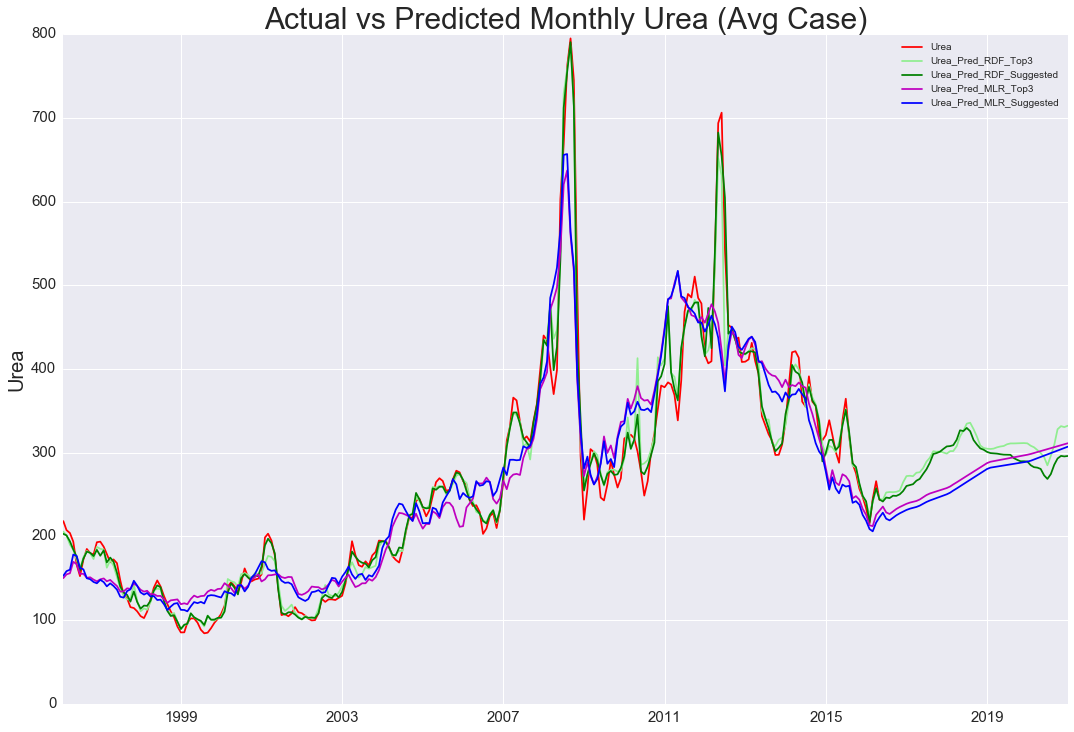

In [112]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
#x_pred = (df['Monthly_Date'][243:])
y1 = (df['Urea'])
y2 = (df['Urea_Pred_RDF_Top3'])
y3 = (df['Urea_Pred_RDF_Suggested'])
y4 = (df['Urea_Pred_MLR_Top3'])
y5 = (df['Urea_Pred_MLR_Suggested'])
#y10 = (df['RDF(MLR)Upper'][243:])
#y11 = (df['RDF(MLR)Lower'][243:])
#y12 = (df['RDF(RDF)Upper'])
#y13 = (df['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'lightgreen')
ax.plot(x,y3,'g')

ax.plot(x,y4,'m')
ax.plot(x,y5,'b')

#ax.plot(x_pred,y10,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y12,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y13,'b--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Avg Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()

# Best Case
#### 		      crude	     corn	      gas	   coal
#### Q2-16	  63.00 	 395.00 	 2.75 	 55.00 
#### Q3-16	  70.00 	 390.00 	 3.00 	 57.00 
#### Q4-16	  72.00 	 410.00 	 3.00 	 57.00 
#### Q1-17	  72.00 	 395.00 	 3.40 	 62.00 
#### Q2-17	  80.00 	 390.00 	 3.30 	 62.00 
#### ALL-17	  82.00 	 410.00 	 3.53 	 75.00 
#### ALL-18	  90.00 	 475.00 	 6.00 	 77.00 
#### ALL-19	  110.00 	 400.00 	 6.00 	 85.00 
#### ALL-20	  150.00 	 550.00 	 6.00 	 67.00 


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilbest.csv")
df_96on = data[['Date','Crude','Corn','My_Coal','Gas','Urea']][0:1062]
df_96on.tail()
#1/5/1996 - 4/30/2016

,Date,Crude,Corn,My_Coal,Gas,Urea
1057,4/8/2016,40.99,365.00,49.85,2.08,248
1058,4/15/2016,41.71,382.00,50.85,2.00,255
1059,4/22/2016,44.54,375.50,51.00,2.27,238
1060,4/29/2016,46.69,391.75,50.75,2.32,232
1061,4/30/2016,46.69,391.75,50.75,2.32,232


In [119]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date       datetime64[ns]
Crude             float64
Corn              float64
My_Coal           float64
Gas               float64
Urea              float64
dtype: object

In [120]:
df_96on.describe()

,Crude,Corn,My_Coal,Gas,Urea
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,54.785461,361.748588,58.269360,4.598559,260.028249
std,31.243572,156.648138,33.567719,2.364318,135.620177
min,11.260000,182.500000,20.900000,1.660000,83.000000
25%,26.417500,231.062500,27.430000,2.760000,151.250000
50%,49.170000,325.500000,51.840000,4.025000,240.000000
75%,81.967500,424.437500,79.675000,5.825000,335.000000
max,145.860000,809.250000,192.500000,14.430000,825.000000


### 2 MLR models I will use (in above case)

### 2 RDF models will be used (parameters found above in exploratory analysis)

In [121]:
#rdf using top 3 variables
X = df_96on[['Crude','Corn','My_Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 230.957, test: 1968.658
R^2 train: 0.988, test: 0.886
[ 0.69169925  0.0928499   0.21545086]


In [122]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_Pred_RDF_Top3'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_Pred_RDF_Top3'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error'] = rdf_error3

mlrtop3_predicted = 22.1919 + (df_96on['Crude']*1.6482) + (df_96on['Corn']*0.1470) + (df_96on['My_Coal']*1.6194) 
df_96on['Urea_Pred_MLR_Top3'] = mlrtop3_predicted
mlrtop3_error = (abs(df_96on['Urea_Pred_MLR_Top3'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_Top3'] = mlrtop3_error

mlrtop3_predicted2 = -6.2494 + (df_96on['Crude']*1.2795) + (df_96on['Corn']*0.2251) + (df_96on['My_Coal']*1.5034) + (df_96on['Gas']*5.9063) 
df_96on['Urea_Pred_MLR_Suggested'] = mlrtop3_predicted2
mlrtop3_error2 = (abs(df_96on['Urea_Pred_MLR_Suggested'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_Suggested'] = mlrtop3_error2

print("Average RDF Top 3 error is: %.3f" % (rdf_error3.mean())) 
print("Average MLR Top3 error is: %.3f" % (mlrtop3_error.mean()))
print("Average MLR Suggested error is: %.3f" % (mlrtop3_error2.mean()))

df_96on

Average RDF Top 3 error is: 5.483
Average MLR Top3 error is: 16.719
Average MLR Suggested error is: 15.472


,Date,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_RDF_Top3,RDF_Top3_Error,Urea_Pred_MLR_Top3,MLR_Error_Top3,Urea_Pred_MLR_Suggested,MLR_Error_Suggested
0,1996-01-05,19.65,369.75,25.36,2.42,220,202.497505,7.955679,150.000264,31.818062,154.542970,29.753195
1,1996-01-12,17.98,366.25,25.27,2.22,220,211.700000,3.772727,146.587524,33.369307,150.301789,31.681005
2,1996-01-19,18.25,365.00,29.07,1.96,218,207.017079,5.038037,153.002508,29.815363,154.543161,29.108642
3,1996-01-26,17.36,360.25,29.20,1.95,215,205.974857,4.197741,151.047882,29.745171,152.471560,29.082995
4,1996-02-02,17.38,370.50,32.11,2.08,205,205.029524,0.014402,157.300050,23.268268,159.947138,21.977006
5,1996-02-09,17.38,367.25,28.67,2.24,205,204.764857,0.114704,151.251564,26.218749,154.988875,24.395671
6,1996-02-16,18.40,382.75,28.17,2.17,210,202.498270,3.572252,154.401528,26.475463,158.617874,24.467679
7,1996-02-23,18.45,383.50,28.83,2.26,210,205.822937,1.989078,155.662992,25.874766,160.374485,23.631198
8,1996-03-01,18.62,386.75,27.86,2.06,210,194.340381,7.456961,154.850118,26.261849,158.684017,24.436182
9,1996-03-08,18.87,388.50,26.51,2.05,205,186.893714,8.832334,153.333228,25.203303,157.309164,23.263822


In [123]:
#best in my opinion
X = df_96on[['Crude','Corn','My_Coal','Gas']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 157.896, test: 1462.467
R^2 train: 0.992, test: 0.915
[ 0.65775145  0.08173687  0.19412232  0.06638935]


In [124]:
#adding last model
urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['Urea_Pred_RDF_Suggested'] = urea_predicted4
rdf_error4 = (abs(df_96on['Urea_Pred_RDF_Suggested'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error_Suggested'] = rdf_error4

print("Average RDF suggested error is: %.3f" % (rdf_error4.mean()))
df_96on

Average RDF suggested error is: 4.528


,Date,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_RDF_Top3,RDF_Top3_Error,Urea_Pred_MLR_Top3,MLR_Error_Top3,Urea_Pred_MLR_Suggested,MLR_Error_Suggested,Urea_Pred_RDF_Suggested,RDF_Top3_Error_Suggested
0,1996-01-05,19.65,369.75,25.36,2.42,220,202.497505,7.955679,150.000264,31.818062,154.542970,29.753195,202.260056,8.063611
1,1996-01-12,17.98,366.25,25.27,2.22,220,211.700000,3.772727,146.587524,33.369307,150.301789,31.681005,211.287778,3.960101
2,1996-01-19,18.25,365.00,29.07,1.96,218,207.017079,5.038037,153.002508,29.815363,154.543161,29.108642,205.395519,5.781872
3,1996-01-26,17.36,360.25,29.20,1.95,215,205.974857,4.197741,151.047882,29.745171,152.471560,29.082995,205.882185,4.240844
4,1996-02-02,17.38,370.50,32.11,2.08,205,205.029524,0.014402,157.300050,23.268268,159.947138,21.977006,203.879852,0.546414
5,1996-02-09,17.38,367.25,28.67,2.24,205,204.764857,0.114704,151.251564,26.218749,154.988875,24.395671,204.610737,0.189884
6,1996-02-16,18.40,382.75,28.17,2.17,210,202.498270,3.572252,154.401528,26.475463,158.617874,24.467679,203.363711,3.160138
7,1996-02-23,18.45,383.50,28.83,2.26,210,205.822937,1.989078,155.662992,25.874766,160.374485,23.631198,204.379811,2.676280
8,1996-03-01,18.62,386.75,27.86,2.06,210,194.340381,7.456961,154.850118,26.261849,158.684017,24.436182,201.535641,4.030647
9,1996-03-08,18.87,388.50,26.51,2.05,205,186.893714,8.832334,153.333228,25.203303,157.309164,23.263822,198.211789,3.311323


In [125]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Crude','Corn','My_Coal','Gas']][1062:2768]
newpred = data [['Crude','Corn','My_Coal']][1062:2768]
newpred3 = data[['Crude','Corn','My_Coal','Gas']][1062:2768]

In [126]:
#new predictions
X = df_96on[['Crude','Corn','My_Coal']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Crude','Corn','My_Coal','Gas']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Urea_Pred_RDF_Top3'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 221.675, test: 2162.569
R^2 train: 0.988, test: 0.875
[ 0.68500225  0.08009868  0.23489906]


,Date,Crude,Corn,My_Coal,Gas,Urea_Pred_RDF_Top3
0,2016-05-01,46.69,391.75,50.75,2.32,235.038238
1,2016-05-02,46.69,391.75,50.75,2.32,235.038238
2,2016-05-03,46.97,391.81,50.82,2.33,238.629716
3,2016-05-04,47.24,391.86,50.89,2.34,241.206787
4,2016-05-05,47.52,391.92,50.97,2.34,241.396787
5,2016-05-06,47.8,391.97,51.04,2.35,241.843453
6,2016-05-07,48.07,392.03,51.11,2.36,241.870120
7,2016-05-08,48.35,392.08,51.18,2.37,251.109367
8,2016-05-09,48.63,392.14,51.25,2.37,256.366726
9,2016-05-10,48.9,392.19,51.33,2.38,271.456374


In [127]:
#other predictions
X = df_96on[['Crude','Corn','My_Coal','Gas']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Urea_Pred_RDF_Suggested'] = df_new_pred2

mlrtop3_predicted5 = 22.1919 + (newpred2['Crude']*1.6482) + (newpred2['Corn']*0.1470) + (newpred2['My_Coal']*1.6194) 
newpred2['Urea_Pred_MLR_Top3'] = mlrtop3_predicted5

mlrtop3_predicted6 = -6.2494 + (newpred2['Crude']*1.2795) + (newpred2['Corn']*0.2251) + (newpred2['My_Coal']*1.5034) + (newpred2['Gas']*5.9063)
newpred2['Urea_Pred_MLR_Suggested'] = mlrtop3_predicted6

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 175.327, test: 1404.432
R^2 train: 0.991, test: 0.919
[ 0.6462796   0.09578378  0.19472743  0.06320919]


,Date,Crude,Corn,My_Coal,Gas,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested
0,2016-05-01,46.69,391.75,50.75,2.32,235.038238,239.077520,238.918,231.674
1,2016-05-02,46.69,391.75,50.75,2.32,235.038238,239.077520,238.918,231.674
2,2016-05-03,46.97,391.81,50.82,2.33,238.629716,241.383304,239.502,232.21
3,2016-05-04,47.24,391.86,50.89,2.34,241.206787,242.150804,240.068,232.731
4,2016-05-05,47.52,391.92,50.97,2.34,241.396787,242.277471,240.667,233.223
5,2016-05-06,47.8,391.97,51.04,2.35,241.843453,242.277471,241.25,233.756
6,2016-05-07,48.07,392.03,51.11,2.36,241.870120,242.881915,241.817,234.28
7,2016-05-08,48.35,392.08,51.18,2.37,251.109367,248.894898,242.399,234.814
8,2016-05-09,48.63,392.14,51.25,2.37,256.366726,253.176400,242.983,235.291
9,2016-05-10,48.9,392.19,51.33,2.38,271.456374,260.115607,243.565,235.827


In [128]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Corn,Crude,Date,Gas,MLR_Error_Suggested,MLR_Error_Top3,My_Coal,RDF_Top3_Error,RDF_Top3_Error_Suggested,Urea,Urea_Pred_MLR_Suggested,Urea_Pred_MLR_Top3,Urea_Pred_RDF_Suggested,Urea_Pred_RDF_Top3
0,369.75,19.65,1996-01-05,2.42,29.753195,31.818062,25.36,7.955679,8.063611,220,154.543,150,202.260056,202.497505
1,366.25,17.98,1996-01-12,2.22,31.681005,33.369307,25.27,3.772727,3.960101,220,150.302,146.588,211.287778,211.700000
2,365,18.25,1996-01-19,1.96,29.108642,29.815363,29.07,5.038037,5.781872,218,154.543,153.003,205.395519,207.017079
3,360.25,17.36,1996-01-26,1.95,29.082995,29.745171,29.2,4.197741,4.240844,215,152.472,151.048,205.882185,205.974857
4,370.5,17.38,1996-02-02,2.08,21.977006,23.268268,32.11,0.014402,0.546414,205,159.947,157.3,203.879852,205.029524
5,367.25,17.38,1996-02-09,2.24,24.395671,26.218749,28.67,0.114704,0.189884,205,154.989,151.252,204.610737,204.764857
6,382.75,18.4,1996-02-16,2.17,24.467679,26.475463,28.17,3.572252,3.160138,210,158.618,154.402,203.363711,202.498270
7,383.5,18.45,1996-02-23,2.26,23.631198,25.874766,28.83,1.989078,2.676280,210,160.374,155.663,204.379811,205.822937
8,386.75,18.62,1996-03-01,2.06,24.436182,26.261849,27.86,7.456961,4.030647,210,158.684,154.85,201.535641,194.340381
9,388.5,18.87,1996-03-08,2.05,23.263822,25.203303,26.51,8.832334,3.311323,205,157.309,153.333,198.211789,186.893714


In [129]:
combined = combined[['Date','Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']
combined

,Date,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested
0,1996-01-05 00:00:00,19.65,369.75,25.36,2.42,220,150,154.543,202.498,202.26
1,1996-01-12 00:00:00,17.98,366.25,25.27,2.22,220,146.588,150.302,211.7,211.288
2,1996-01-19 00:00:00,18.25,365,29.07,1.96,218,153.003,154.543,207.017,205.396
3,1996-01-26 00:00:00,17.36,360.25,29.2,1.95,215,151.048,152.472,205.975,205.882
4,1996-02-02 00:00:00,17.38,370.5,32.11,2.08,205,157.3,159.947,205.03,203.88
5,1996-02-09 00:00:00,17.38,367.25,28.67,2.24,205,151.252,154.989,204.765,204.611
6,1996-02-16 00:00:00,18.4,382.75,28.17,2.17,210,154.402,158.618,202.498,203.364
7,1996-02-23 00:00:00,18.45,383.5,28.83,2.26,210,155.663,160.374,205.823,204.38
8,1996-03-01 00:00:00,18.62,386.75,27.86,2.06,210,154.85,158.684,194.34,201.536
9,1996-03-08 00:00:00,18.87,388.5,26.51,2.05,205,153.333,157.309,186.894,198.212


In [130]:
combined.to_csv("C:/Users/msteinme/Documents/ureaaprilbestresults.csv")

In [131]:
#split into months
cols = ['Date','Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [132]:
mycolumns = ['Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested
295,134.986129,493.698710,73.756452,6,NaN,436.690946,423.920181,366.241476,382.938449
296,138.329000,506.233000,72.252000,6,NaN,441.606898,428.757061,369.770344,385.090550
297,141.671935,518.767097,70.748065,6,NaN,446.523763,433.594755,375.107365,386.974467
298,145.013000,531.301333,69.244000,6,NaN,451.437356,438.429893,372.025714,386.891828
299,148.355806,543.835806,67.739677,6,NaN,456.353437,443.266925,369.692553,387.147922


In [133]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [134]:
print(df.dtypes)
df.tail()

Crude                             float64
Corn                              float64
My_Coal                           float64
Gas                               float64
Urea                              float64
Urea_Pred_MLR_Top3                float64
Urea_Pred_MLR_Suggested           float64
Urea_Pred_RDF_Top3                float64
Urea_Pred_RDF_Suggested           float64
Monthly_Date               datetime64[ns]
dtype: object


,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested,Monthly_Date
295,134.986129,493.698710,73.756452,6,NaN,436.690946,423.920181,366.241476,382.938449,2020-08-31
296,138.329000,506.233000,72.252000,6,NaN,441.606898,428.757061,369.770344,385.090550,2020-09-30
297,141.671935,518.767097,70.748065,6,NaN,446.523763,433.594755,375.107365,386.974467,2020-10-31
298,145.013000,531.301333,69.244000,6,NaN,451.437356,438.429893,372.025714,386.891828,2020-11-30
299,148.355806,543.835806,67.739677,6,NaN,456.353437,443.266925,369.692553,387.147922,2020-12-31


In [135]:
df.to_csv("C:/Users/msteinme/Documents/ureaaprilbestresultsmonthly.csv")

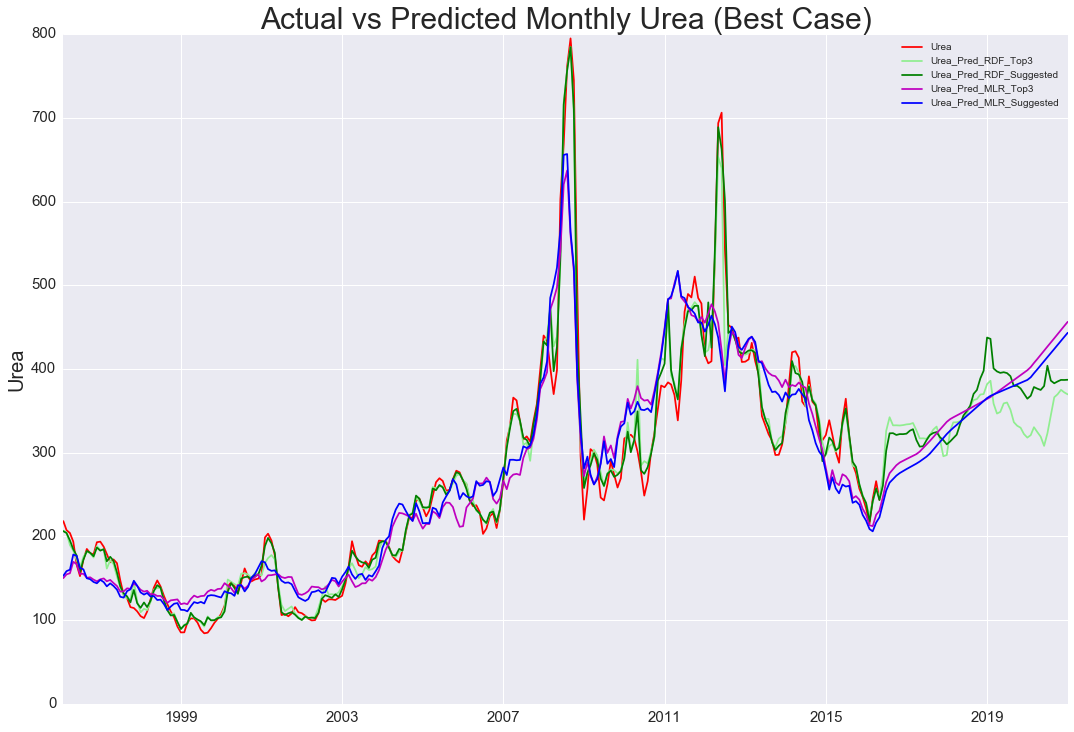

In [136]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
#x_pred = (df['Monthly_Date'][243:])
y1 = (df['Urea'])
y2 = (df['Urea_Pred_RDF_Top3'])
y3 = (df['Urea_Pred_RDF_Suggested'])
y4 = (df['Urea_Pred_MLR_Top3'])
y5 = (df['Urea_Pred_MLR_Suggested'])
#y10 = (df['RDF(MLR)Upper'][243:])
#y11 = (df['RDF(MLR)Lower'][243:])
#y12 = (df['RDF(RDF)Upper'])
#y13 = (df['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'lightgreen')
ax.plot(x,y3,'g')

ax.plot(x,y4,'m')
ax.plot(x,y5,'b')

#ax.plot(x_pred,y10,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y12,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y13,'b--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()

# Worst Case
#### 	          crude	       corn	      gas	   coal
#### Q2-16	  34.00 	 345.00 	 1.75 	 49.40 
#### Q3-16	  35.00 	 340.00 	 2.05 	 48.50 
#### Q4-16	  35.00 	 335.00 	 2.10 	 47.50 
#### Q1-17	  37.00 	 335.00 	 2.25 	 47.00 
#### Q2-17	  40.00 	 350.00 	 2.05 	 47.00 
#### ALL-17	  38.50 	 361.00 	 2.24 	 47.00 
#### ALL-18	  48.70 	 378.00 	 2.60 	 48.20 
#### ALL-19	  46.00 	 384.00 	 2.61 	 48.70 
#### ALL-20	  54.00 	 388.00 	 2.56 	 49.20 


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilworst.csv")
df_96on = data[['Date','Crude','Corn','My_Coal','Gas','Urea']][0:1062]
df_96on.tail()
#1/5/1996 - 4/30/2016

,Date,Crude,Corn,My_Coal,Gas,Urea
1057,4/8/2016,40.99,365.00,49.85,2.08,248
1058,4/15/2016,41.71,382.00,50.85,2.00,255
1059,4/22/2016,44.54,375.50,51.00,2.27,238
1060,4/29/2016,46.69,391.75,50.75,2.32,232
1061,4/30/2016,46.69,391.75,50.75,2.32,232


In [138]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date       datetime64[ns]
Crude             float64
Corn              float64
My_Coal           float64
Gas               float64
Urea              float64
dtype: object

In [141]:
df_96on.describe()

,Crude,Corn,My_Coal,Gas,Urea
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,54.785461,361.748588,58.269360,4.598559,260.028249
std,31.243572,156.648138,33.567719,2.364318,135.620177
min,11.260000,182.500000,20.900000,1.660000,83.000000
25%,26.417500,231.062500,27.430000,2.760000,151.250000
50%,49.170000,325.500000,51.840000,4.025000,240.000000
75%,81.967500,424.437500,79.675000,5.825000,335.000000
max,145.860000,809.250000,192.500000,14.430000,825.000000


### 2 MLR Models I will use same as in Avg case

### 2 RDF models will be used (parameters found above in exploratory analysis)

In [139]:
#rdf using top 3 variables
X = df_96on[['Crude','Corn','My_Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 228.837, test: 2050.814
R^2 train: 0.988, test: 0.881
[ 0.6437913   0.10943196  0.24677674]


In [140]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_Pred_RDF_Top3'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_Pred_RDF_Top3'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error'] = rdf_error3

mlrtop3_predicted = 22.1919 + (df_96on['Crude']*1.6482) + (df_96on['Corn']*0.1470) + (df_96on['My_Coal']*1.6194) 
df_96on['Urea_Pred_MLR_Top3'] = mlrtop3_predicted
mlrtop3_error = (abs(df_96on['Urea_Pred_MLR_Top3'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_Top3'] = mlrtop3_error

mlrtop3_predicted2 = -6.2494 + (df_96on['Crude']*1.2795) + (df_96on['Corn']*0.2251) + (df_96on['My_Coal']*1.5034) + (df_96on['Gas']*5.9063) 
df_96on['Urea_Pred_MLR_Suggested'] = mlrtop3_predicted2
mlrtop3_error2 = (abs(df_96on['Urea_Pred_MLR_Suggested'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error_Suggested'] = mlrtop3_error2

print("Average RDF Top 3 error is: %.3f" % (rdf_error3.mean())) 
print("Average MLR Top3 error is: %.3f" % (mlrtop3_error.mean()))
print("Average MLR Suggested error is: %.3f" % (mlrtop3_error2.mean()))

df_96on

Average RDF Top 3 error is: 5.466
Average MLR Top3 error is: 16.719
Average MLR Suggested error is: 15.472


,Date,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_RDF_Top3,RDF_Top3_Error,Urea_Pred_MLR_Top3,MLR_Error_Top3,Urea_Pred_MLR_Suggested,MLR_Error_Suggested
0,1996-01-05,19.65,369.75,25.36,2.42,220,207.841667,5.526515,150.000264,31.818062,154.542970,29.753195
1,1996-01-12,17.98,366.25,25.27,2.22,220,211.093333,4.048485,146.587524,33.369307,150.301789,31.681005
2,1996-01-19,18.25,365.00,29.07,1.96,218,204.044593,6.401563,153.002508,29.815363,154.543161,29.108642
3,1996-01-26,17.36,360.25,29.20,1.95,215,204.601333,4.836589,151.047882,29.745171,152.471560,29.082995
4,1996-02-02,17.38,370.50,32.11,2.08,205,201.188397,1.859319,157.300050,23.268268,159.947138,21.977006
5,1996-02-09,17.38,367.25,28.67,2.24,205,204.496889,0.245420,151.251564,26.218749,154.988875,24.395671
6,1996-02-16,18.40,382.75,28.17,2.17,210,199.769656,4.871592,154.401528,26.475463,158.617874,24.467679
7,1996-02-23,18.45,383.50,28.83,2.26,210,203.670926,3.013845,155.662992,25.874766,160.374485,23.631198
8,1996-03-01,18.62,386.75,27.86,2.06,210,195.522037,6.894268,154.850118,26.261849,158.684017,24.436182
9,1996-03-08,18.87,388.50,26.51,2.05,205,189.681481,7.472448,153.333228,25.203303,157.309164,23.263822


In [141]:
#best in my opinion
X = df_96on[['Crude','Corn','My_Coal','Gas']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 159.361, test: 1456.107
R^2 train: 0.992, test: 0.916
[ 0.64424223  0.08745198  0.20334892  0.06495688]


In [142]:
#adding last model
urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['Urea_Pred_RDF_Suggested'] = urea_predicted4
rdf_error4 = (abs(df_96on['Urea_Pred_RDF_Suggested'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error_Suggested'] = rdf_error4

print("Average RDF suggested error is: %.3f" % (rdf_error4.mean()))
df_96on

Average RDF suggested error is: 4.517


,Date,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_RDF_Top3,RDF_Top3_Error,Urea_Pred_MLR_Top3,MLR_Error_Top3,Urea_Pred_MLR_Suggested,MLR_Error_Suggested,Urea_Pred_RDF_Suggested,RDF_Top3_Error_Suggested
0,1996-01-05,19.65,369.75,25.36,2.42,220,207.841667,5.526515,150.000264,31.818062,154.542970,29.753195,199.788113,9.187221
1,1996-01-12,17.98,366.25,25.27,2.22,220,211.093333,4.048485,146.587524,33.369307,150.301789,31.681005,210.940000,4.118182
2,1996-01-19,18.25,365.00,29.07,1.96,218,204.044593,6.401563,153.002508,29.815363,154.543161,29.108642,204.228030,6.317417
3,1996-01-26,17.36,360.25,29.20,1.95,215,204.601333,4.836589,151.047882,29.745171,152.471560,29.082995,203.968030,5.131149
4,1996-02-02,17.38,370.50,32.11,2.08,205,201.188397,1.859319,157.300050,23.268268,159.947138,21.977006,203.101364,0.926164
5,1996-02-09,17.38,367.25,28.67,2.24,205,204.496889,0.245420,151.251564,26.218749,154.988875,24.395671,203.672660,0.647483
6,1996-02-16,18.40,382.75,28.17,2.17,210,199.769656,4.871592,154.401528,26.475463,158.617874,24.467679,204.701444,2.523122
7,1996-02-23,18.45,383.50,28.83,2.26,210,203.670926,3.013845,155.662992,25.874766,160.374485,23.631198,205.579444,2.105026
8,1996-03-01,18.62,386.75,27.86,2.06,210,195.522037,6.894268,154.850118,26.261849,158.684017,24.436182,202.432000,3.603810
9,1996-03-08,18.87,388.50,26.51,2.05,205,189.681481,7.472448,153.333228,25.203303,157.309164,23.263822,199.869778,2.502547


In [143]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Crude','Corn','My_Coal','Gas']][1062:2768]
newpred = data [['Crude','Corn','My_Coal']][1062:2768]
newpred3 = data[['Crude','Corn','My_Coal','Gas']][1062:2768]

In [144]:
#new predictions
X = df_96on[['Crude','Corn','My_Coal']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Crude','Corn','My_Coal','Gas']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Urea_Pred_RDF_Top3'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 213.707, test: 2049.222
R^2 train: 0.989, test: 0.882
[ 0.67252968  0.09630349  0.23116683]


,Date,Crude,Corn,My_Coal,Gas,Urea_Pred_RDF_Top3
0,2016-05-01,46.69,391.75,50.75,2.32,235.500208
1,2016-05-02,46.69,391.75,50.75,2.32,235.500208
2,2016-05-03,46.47,390.96,50.73,2.31,236.373541
3,2016-05-04,46.26,390.17,50.7,2.3,238.899309
4,2016-05-05,46.04,389.37,50.68,2.29,242.842785
5,2016-05-06,45.83,388.58,50.66,2.28,244.145209
6,2016-05-07,45.61,387.79,50.64,2.27,244.815765
7,2016-05-08,45.4,387,50.61,2.26,245.209098
8,2016-05-09,45.18,386.2,50.59,2.25,245.100050
9,2016-05-10,44.97,385.41,50.57,2.24,244.980050


In [145]:
#other predictions
X = df_96on[['Crude','Corn','My_Coal','Gas']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Urea_Pred_RDF_Suggested'] = df_new_pred2

mlrtop3_predicted5 = 22.1919 + (newpred2['Crude']*1.6482) + (newpred2['Corn']*0.1470) + (newpred2['My_Coal']*1.6194) 
newpred2['Urea_Pred_MLR_Top3'] = mlrtop3_predicted5

mlrtop3_predicted6 = -6.2494 + (newpred2['Crude']*1.2795) + (newpred2['Corn']*0.2251) + (newpred2['My_Coal']*1.5034) + (newpred2['Gas']*5.9063)
newpred2['Urea_Pred_MLR_Suggested'] = mlrtop3_predicted6

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 177.468, test: 1367.872
R^2 train: 0.991, test: 0.921
[ 0.64090941  0.08370964  0.20888536  0.06649558]


,Date,Crude,Corn,My_Coal,Gas,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested
0,2016-05-01,46.69,391.75,50.75,2.32,235.500208,235.446982,238.918,231.674
1,2016-05-02,46.69,391.75,50.75,2.32,235.500208,235.446982,238.918,231.674
2,2016-05-03,46.47,390.96,50.73,2.31,236.373541,235.794389,238.407,231.125
3,2016-05-04,46.26,390.17,50.7,2.3,238.899309,236.973423,237.896,230.574
4,2016-05-05,46.04,389.37,50.68,2.29,242.842785,241.302456,237.384,230.024
5,2016-05-06,45.83,388.58,50.66,2.28,244.145209,241.952456,236.889,229.488
6,2016-05-07,45.61,387.79,50.64,2.27,244.815765,242.488012,236.378,228.94
7,2016-05-08,45.4,387,50.61,2.26,245.209098,242.721600,235.867,228.389
8,2016-05-09,45.18,386.2,50.59,2.25,245.100050,243.028267,235.354,227.838
9,2016-05-10,44.97,385.41,50.57,2.24,244.980050,242.894933,234.86,227.303


In [146]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Corn,Crude,Date,Gas,MLR_Error_Suggested,MLR_Error_Top3,My_Coal,RDF_Top3_Error,RDF_Top3_Error_Suggested,Urea,Urea_Pred_MLR_Suggested,Urea_Pred_MLR_Top3,Urea_Pred_RDF_Suggested,Urea_Pred_RDF_Top3
0,369.75,19.65,1996-01-05,2.42,29.753195,31.818062,25.36,5.526515,9.187221,220,154.543,150,199.788113,207.841667
1,366.25,17.98,1996-01-12,2.22,31.681005,33.369307,25.27,4.048485,4.118182,220,150.302,146.588,210.940000,211.093333
2,365,18.25,1996-01-19,1.96,29.108642,29.815363,29.07,6.401563,6.317417,218,154.543,153.003,204.228030,204.044593
3,360.25,17.36,1996-01-26,1.95,29.082995,29.745171,29.2,4.836589,5.131149,215,152.472,151.048,203.968030,204.601333
4,370.5,17.38,1996-02-02,2.08,21.977006,23.268268,32.11,1.859319,0.926164,205,159.947,157.3,203.101364,201.188397
5,367.25,17.38,1996-02-09,2.24,24.395671,26.218749,28.67,0.245420,0.647483,205,154.989,151.252,203.672660,204.496889
6,382.75,18.4,1996-02-16,2.17,24.467679,26.475463,28.17,4.871592,2.523122,210,158.618,154.402,204.701444,199.769656
7,383.5,18.45,1996-02-23,2.26,23.631198,25.874766,28.83,3.013845,2.105026,210,160.374,155.663,205.579444,203.670926
8,386.75,18.62,1996-03-01,2.06,24.436182,26.261849,27.86,6.894268,3.603810,210,158.684,154.85,202.432000,195.522037
9,388.5,18.87,1996-03-08,2.05,23.263822,25.203303,26.51,7.472448,2.502547,205,157.309,153.333,199.869778,189.681481


In [147]:
combined = combined[['Date','Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']
combined

,Date,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested
0,1996-01-05 00:00:00,19.65,369.75,25.36,2.42,220,150,154.543,207.842,199.788
1,1996-01-12 00:00:00,17.98,366.25,25.27,2.22,220,146.588,150.302,211.093,210.94
2,1996-01-19 00:00:00,18.25,365,29.07,1.96,218,153.003,154.543,204.045,204.228
3,1996-01-26 00:00:00,17.36,360.25,29.2,1.95,215,151.048,152.472,204.601,203.968
4,1996-02-02 00:00:00,17.38,370.5,32.11,2.08,205,157.3,159.947,201.188,203.101
5,1996-02-09 00:00:00,17.38,367.25,28.67,2.24,205,151.252,154.989,204.497,203.673
6,1996-02-16 00:00:00,18.4,382.75,28.17,2.17,210,154.402,158.618,199.77,204.701
7,1996-02-23 00:00:00,18.45,383.5,28.83,2.26,210,155.663,160.374,203.671,205.579
8,1996-03-01 00:00:00,18.62,386.75,27.86,2.06,210,154.85,158.684,195.522,202.432
9,1996-03-08 00:00:00,18.87,388.5,26.51,2.05,205,153.333,157.309,189.681,199.87


In [148]:
combined.to_csv("C:/Users/msteinme/Documents/ureaaprilworstresults.csv")

In [149]:
#split into months
cols = ['Date','Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [150]:
mycolumns = ['Crude','Corn','My_Coal','Gas','Urea','Urea_Pred_MLR_Top3','Urea_Pred_MLR_Suggested','Urea_Pred_RDF_Top3','Urea_Pred_RDF_Suggested']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested
295,50.997097,386.498710,49.012258,2.580,NaN,242.431076,234.925528,248.233943,249.736321
296,51.665667,386.833000,49.054000,2.574,NaN,243.649750,235.883529,248.736377,249.581640
297,52.334516,387.167097,49.096129,2.570,NaN,244.869484,236.854238,250.017584,250.375914
298,53.002667,387.501333,49.137667,2.568,NaN,246.087129,237.835009,250.111049,251.013047
299,53.671290,387.835806,49.179355,2.560,NaN,247.305831,238.781226,250.737286,251.256488


In [151]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [152]:
print(df.dtypes)
df.tail()

Crude                             float64
Corn                              float64
My_Coal                           float64
Gas                               float64
Urea                              float64
Urea_Pred_MLR_Top3                float64
Urea_Pred_MLR_Suggested           float64
Urea_Pred_RDF_Top3                float64
Urea_Pred_RDF_Suggested           float64
Monthly_Date               datetime64[ns]
dtype: object


,Crude,Corn,My_Coal,Gas,Urea,Urea_Pred_MLR_Top3,Urea_Pred_MLR_Suggested,Urea_Pred_RDF_Top3,Urea_Pred_RDF_Suggested,Monthly_Date
295,50.997097,386.498710,49.012258,2.580,NaN,242.431076,234.925528,248.233943,249.736321,2020-08-31
296,51.665667,386.833000,49.054000,2.574,NaN,243.649750,235.883529,248.736377,249.581640,2020-09-30
297,52.334516,387.167097,49.096129,2.570,NaN,244.869484,236.854238,250.017584,250.375914,2020-10-31
298,53.002667,387.501333,49.137667,2.568,NaN,246.087129,237.835009,250.111049,251.013047,2020-11-30
299,53.671290,387.835806,49.179355,2.560,NaN,247.305831,238.781226,250.737286,251.256488,2020-12-31


In [153]:
df.to_csv("C:/Users/msteinme/Documents/ureaaprilworstresultsmonthly.csv")

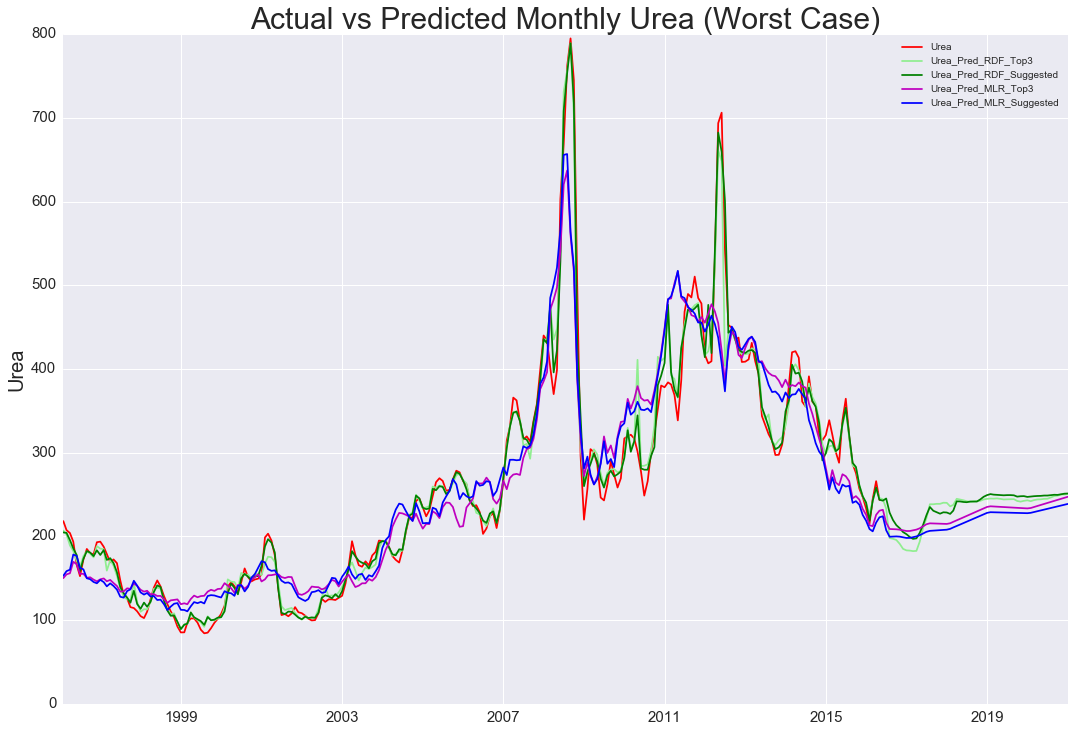

In [154]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
#x_pred = (df['Monthly_Date'][243:])
y1 = (df['Urea'])
y2 = (df['Urea_Pred_RDF_Top3'])
y3 = (df['Urea_Pred_RDF_Suggested'])
y4 = (df['Urea_Pred_MLR_Top3'])
y5 = (df['Urea_Pred_MLR_Suggested'])
#y10 = (df['RDF(MLR)Upper'][243:])
#y11 = (df['RDF(MLR)Lower'][243:])
#y12 = (df['RDF(RDF)Upper'])
#y13 = (df['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'lightgreen')
ax.plot(x,y3,'g')

ax.plot(x,y4,'m')
ax.plot(x,y5,'b')

#ax.plot(x_pred,y10,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y12,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y13,'b--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Worst Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()